### Santander EDA, ML Explainability, and Prediction

#### Content

1. [Introduction](#Introduction)<br>
2. [Load Packages](#Load_Packages)<br>
    A. [Import](#Import)<br>
    B. [Setup](#Setup)<br>
    C. [Version](#Version)<br>
3. [Problem Definition](Problem_Definition)<br>
    A. [Problem Feature](#Problem_Feature)<br>
    B. [Aim](#Aim)<br>
    C. [Variables](#Variables)<br>
4. [Exploratory Data Analysis(EDA)](#Exploratory_Data_Analysis(EDA))<br>
    A. [Data Collection](#Data_Collection)<br>
    B. [Data Visualization](#Data_Visualization)<br>
    C. [Data Preprocessing](#Data_Preprocessing)<br>    
5. [Machine Learning Explainability for Santander](#Machine_Learning_Explainability_for_Santander)<br>
    A. [Partial Dependence Plots](#Partial_Dependence_Plots)<br>
    B. [SHAP Values](#SHAP_Values)<br>
6. [Model developement](#Model_developement)<br>
    A. [Lightbm](#Lightbm)<br>
    B. [RandomForestClassifier](#RandomForestClassifier)<br>
    C. [DecisionTreeClassifier](#DecisionTreeClassifier)<br>
    D. [CatBoostClassifier](#CatBoostClassifier)<br>    
7. [References](#References)<br>

<a id='Introduction'></a>

### 1. Introduction

At [Santander](https://www.santanderbank.com/us/personal) our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.<br>
The goal is to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.<br>
In the following we are going to perform explainatory data analysis and machine learning explainability based on this awsome [tutorial](https://www.kaggle.com/learn/machine-learning-explainability). 

### 2. Load Packages

##### A. Import

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc

##### B. Setup

In [57]:
# for get better result chage fold_n to 5
fold_n=5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

##### C. Version 

In [58]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

Pandas: 1.0.3
Numpy: 1.17.0
Python: 3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:18:50) [MSC v.1900 64 bit (AMD64)]


### 3. Problem Definition 

The goal of this challenge is to identify which **customers** will make a **specific transaction** in the future, irrespective of the amount of money transacted. 

##### A. Problem Feature
    1. train.csv - the training set.
    2. test.csv - the test set.

##### B. Aim
The task is to predict the **target value** for the test set.


##### C. Variables 

The data is **anonymized** which contains just numeric feature variables, the binary **target** column, and a string **ID_code** column. 

##### D. Evaluation

???????

### Exploratory Data Analysis(EDA)

In this sextion, we will explore the dataset through some numerical and graphical techniques tobegin uncovering the structure of the data.

- Data collection
- Visualization
- Data Preprocessing
- Data Cleaning

##### A. Data Collection 

In [59]:
# importing train and test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
train.shape, test.shape

((200000, 202), (200000, 201))

Both train and test 200,000 rows and 202 and 201 columns respectively. 

##### A.1 Dataset Fields 

Now, let us take a look at the head of train and test to get a brief idea about the dataset.

In [61]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.925500000000000,-6.7863,11.908099999999999,5.093000000000000,11.460699999999999,-9.2834,5.1187,18.626600000000000,...,4.4354,3.9642,3.1364,1.691000000000000,18.522700000000000,-2.3978,7.8784,8.563499999999999,12.780300000000000,-1.091400000000000
1,train_1,0,11.500600000000000,-4.1473,13.858800000000000,5.388999999999999,12.362200000000000,7.0433,5.6208,16.533799999999999,...,7.6421,7.7214,2.5837,10.951599999999999,15.430500000000000,2.0339,8.1267,8.788900000000000,18.355999999999998,1.951800000000000
2,train_2,0,8.609299999999999,-2.7457,12.080500000000001,7.892800000000000,10.582500000000000,-9.0837,6.9427,14.615500000000001,...,2.9057,9.7905,1.6704,1.685800000000000,21.604199999999999,3.1417,-6.5213,8.267500000000000,14.722200000000001,0.396500000000000
3,train_3,0,11.060400000000000,-2.1518,8.952199999999999,7.195700000000000,12.584600000000000,-1.8361,5.8428,14.925000000000001,...,4.4666,4.7433,0.7178,1.421400000000000,23.034700000000001,-1.2706,-2.9275,10.292199999999999,17.969700000000000,-8.999599999999999
4,train_4,0,9.836900000000000,-1.4834,12.874599999999999,6.637500000000000,12.277200000000001,2.4486,5.9405,19.251400000000000,...,-1.4905,9.5214,-0.1508,9.194200000000000,13.287599999999999,-1.5121,3.9267,9.503100000000000,17.997399999999999,-8.810400000000000


In [62]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.953600000000000,9.4292,11.432700000000001,-2.380500000000000,5.8493,18.267499999999998,2.1337,...,-2.1556,11.849500000000001,-1.4300,2.4508,13.711200000000000,2.4669,4.3654,10.720000000000001,15.472200000000001,-8.719700000000000
1,test_1,8.5304,1.2543,11.304700000000000,5.1858,9.197400000000000,-4.011700000000000,6.0196,18.631599999999999,-4.4131,...,10.6165,8.834899999999999,0.9403,10.1282,15.576499999999999,0.4773,-1.4852,9.871400000000000,19.129300000000001,-20.975999999999999
2,test_2,5.4827,-10.3581,10.140700000000001,7.0479,10.262800000000000,9.805199999999999,4.8950,20.253699999999998,1.5233,...,-0.7484,10.993499999999999,1.9803,2.1800,12.981299999999999,2.1281,-7.1086,7.061800000000000,19.895600000000002,-23.179400000000001
3,test_3,8.5374,-1.3222,12.022000000000000,6.5749,8.845800000000001,3.174400000000000,4.9397,20.565999999999999,3.3755,...,9.5702,9.076599999999999,1.6580,3.5813,15.187400000000000,3.1656,3.9567,9.229500000000000,13.016800000000000,-4.210800000000000
4,test_4,11.7058,-0.1327,14.129500000000000,7.7506,9.103500000000000,-8.584800000000000,6.8595,10.604799999999999,2.9890,...,4.2259,9.172300000000000,1.2835,3.3778,19.554200000000002,-0.2860,-5.1612,7.288200000000000,13.925999999999998,-9.184600000000000


In [63]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


From the **info()** method we can understand that our training dataset contains 202 columns with 200 columns of 'float64' data type , one column of  'int64' data type, and one column of 'object' data type.

In [65]:
# Describe Numerical Value for training set
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,...,200000.000000000000000,200000.000000000000000,200000.00000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000
mean,0.100490000000000,10.679914252000151,-1.627621689499992,10.715191851000073,6.796529157000018,11.078333240500118,-5.065317493499968,5.408948681499958,16.545849889500108,0.284161849999996,...,3.234439775999965,7.438408337000044,1.92783851400003,3.331773684500021,17.993784182999992,-0.142088433500005,2.303335243500019,8.908157683499990,15.870720248000522,-3.326536900499999
std,0.300652975806355,3.040050870668801,4.050044189955011,2.640894191799927,2.043319016359718,1.623149533936866,7.863266683476754,0.866607266216908,3.418075578937139,3.332633536717585,...,4.559921679910722,3.023271794723963,1.47842289233660,3.992030367901846,3.135161996426620,1.429372364408401,5.454369250069321,0.921625484493855,3.010945491221765,10.438015107352546
min,0.000000000000000,0.408400000000000,-15.043400000000000,2.117100000000000,-0.040200000000000,5.074800000000000,-32.562600000000003,2.347300000000000,5.349700000000000,-10.505500000000000,...,-14.093299999999999,-2.691700000000000,-3.81450000000000,-11.783400000000000,8.694400000000000,-5.261000000000000,-14.209600000000000,5.960600000000000,6.299300000000000,-38.852800000000002
25%,0.000000000000000,8.453850000000001,-4.740025000000000,8.722474999999999,5.254075000000000,9.883175000000000,-11.200350000000000,4.767700000000000,13.943800000000000,-2.317800000000000,...,-0.058825000000000,5.157400000000000,0.88977500000000,0.584600000000000,15.629799999999999,-1.170700000000000,-1.946925000000000,8.252800000000001,13.829700000000001,-11.208475000000000
50%,0.000000000000000,10.524750000000001,-1.608050000000000,10.580000000000000,6.825000000000000,11.108250000000000,-4.833150000000000,5.385100000000000,16.456800000000001,0.393700000000000,...,3.203600000000000,7.347750000000000,1.90130000000000,3.396350000000000,17.957949999999997,-0.172700000000000,2.408900000000000,8.888199999999999,15.934050000000001,-2.819550000000000
75%,0.000000000000000,12.758200000000000,1.358625000000000,12.516700000000000,8.324100000000000,12.261125000000002,0.924800000000000,6.002999999999999,19.102900000000002,2.937900000000000,...,6.406200000000000,9.512525000000000,2.94950000000000,6.205800000000000,20.396524999999997,0.829600000000000,6.556725000000000,9.593299999999999,18.064724999999999,4.836800000000000
max,1.000000000000000,20.315000000000001,10.376799999999999,19.352999999999998,13.188300000000000,16.671399999999998,17.251600000000000,8.447699999999999,27.691800000000001,10.151300000000001,...,18.440899999999999,16.716500000000000,8.40240000000000,18.281800000000000,27.928799999999999,4.272900000000000,18.321500000000000,12.000400000000001,26.079100000000000,28.500699999999998


The describe method for **numerical data** provide information which include count, mean, std(standars deviation), min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [66]:
# Describe Numerical Value for test set
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,...,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000
mean,10.658737106499814,-1.624243780000001,10.707451979500098,6.788213908500028,11.076399133000201,-5.050557728999840,5.415164112499948,16.529142737500187,0.277134826000005,7.569407457999987,...,3.189766290500038,7.458269406000029,1.925944148000011,3.322015686499963,17.996966971999775,-0.133656945500000,2.290898700500025,8.912428147499998,15.869183606499927,-3.246341973000006
std,3.036715580819891,4.040509145134395,2.633888454459103,2.052723659414844,1.616456202024966,7.869293010371570,0.864686131639427,3.424481815614266,3.333374933609618,1.231865473138074,...,4.551239144908742,3.025189353414047,1.479966003195186,3.995598711971345,3.140652495578780,1.429678194738301,5.446345508745113,0.920904306663015,3.008717108209617,10.398588894115639
min,0.188700000000000,-15.043400000000000,2.355200000000000,-0.022400000000000,5.484400000000000,-27.766999999999999,2.216400000000000,5.713700000000000,-9.956000000000000,4.243300000000000,...,-14.093299999999999,-2.407000000000000,-3.340900000000000,-11.413100000000000,9.382800000000000,-4.911900000000000,-13.944200000000000,6.169600000000000,6.584000000000000,-39.457799999999999
25%,8.442975000000001,-4.700125000000000,8.735600000000000,5.230500000000000,9.891074999999999,-11.201400000000000,4.772600000000000,13.933900000000000,-2.303900000000000,6.623800000000000,...,-0.095000000000000,5.166500000000000,0.882975000000000,0.587600000000000,15.634775000000001,-1.160700000000000,-1.948600000000000,8.260074999999999,13.847275000000000,-11.124000000000001
50%,10.513800000000000,-1.590500000000000,10.560700000000001,6.822350000000000,11.099750000000000,-4.834100000000000,5.391600000000000,16.422699999999999,0.372000000000000,7.632000000000001,...,3.162400000000000,7.379000000000000,1.892600000000000,3.428500000000000,17.977599999999999,-0.162000000000000,2.403600000000000,8.892799999999999,15.943400000000000,-2.725950000000000
75%,12.739599999999999,1.343400000000000,12.495025000000000,8.327600000000000,12.253399999999999,0.942575000000000,6.005800000000000,19.094550000000002,2.930025000000000,8.584824999999999,...,6.336475000000000,9.531100000000000,2.956000000000000,6.174200000000000,20.391725000000001,0.837900000000000,6.519800000000000,9.595900000000000,18.045200000000001,4.935400000000000
max,22.323399999999999,9.385100000000000,18.714099999999998,13.142000000000001,16.037099999999999,17.253699999999998,8.302500000000000,28.292800000000000,9.665500000000000,11.003600000000000,...,20.359000000000002,16.716500000000000,8.005000000000001,17.632600000000000,27.947800000000001,4.545400000000000,15.920700000000000,12.275800000000000,26.538399999999999,27.907399999999999


##### B.Data Visualization 

**ScatterPlot**<br>
This is the scatter plot for the first 20 columns of the train and test set. On the axis X you will find the train values and on the axis Y you will find the test values.

In [67]:
def scatter_plot(df1, df2, features):
    i = 0
    sns.set_style('darkgrid')
    plt.figure()
    fig, ax = plt.subplots(5,4,figsize=(14,14))
    
    for feature in features:
        i += 1
        plt.subplot(6,4,i)
        plt.scatter(x=df1[feature], y=df2[feature], c='g', marker= '*')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

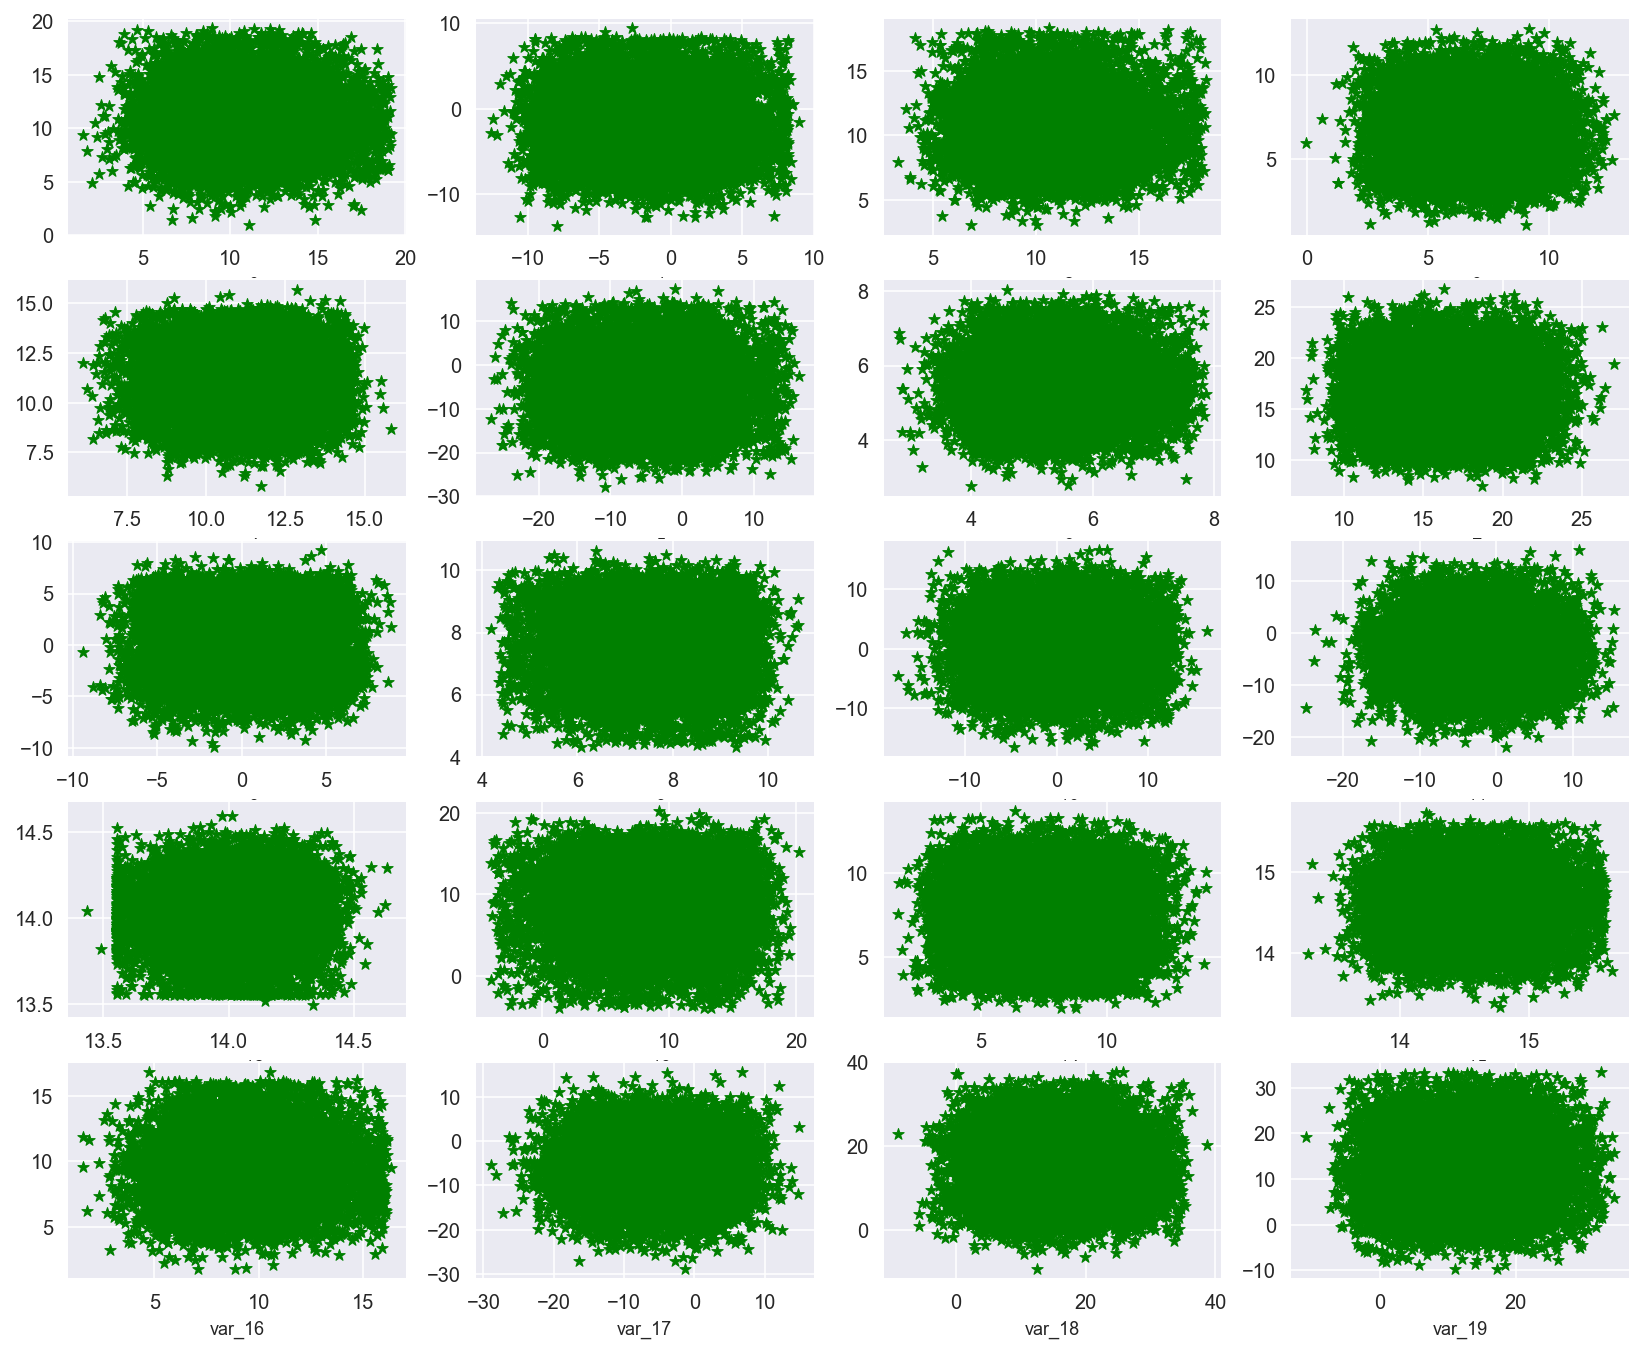

In [68]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           'var_16', 'var_17', 'var_18', 'var_19']

scatter_plot(train[::20], test[::20], features);

**CountPlot**<br>
Now, let us check the distribution of the **target** value in the training set.

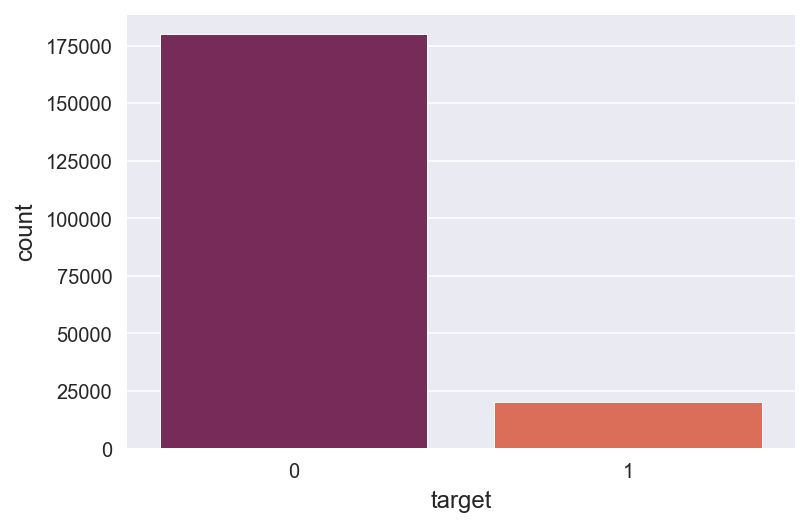

In [69]:
sns.countplot(x='target', data=train, palette='rocket');

As you can see, the target values are 0 and 1 which vary greatly in count and is unbalanced.

In [70]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [71]:
print('The 1 value in the target is {}% and the 0 value in the target is {}%!'.format(train['target'].value_counts()[1] * 100 / train.shape[0],
                                                                                     train['target'].value_counts()[0] * 100 / train.shape[0]))

The 1 value in the target is 10.049% and the 0 value in the target is 89.951%!


**Distribution of mean and std**<br>
Now, let's show the distribution  of the mean values per **row** in the train and the test set.

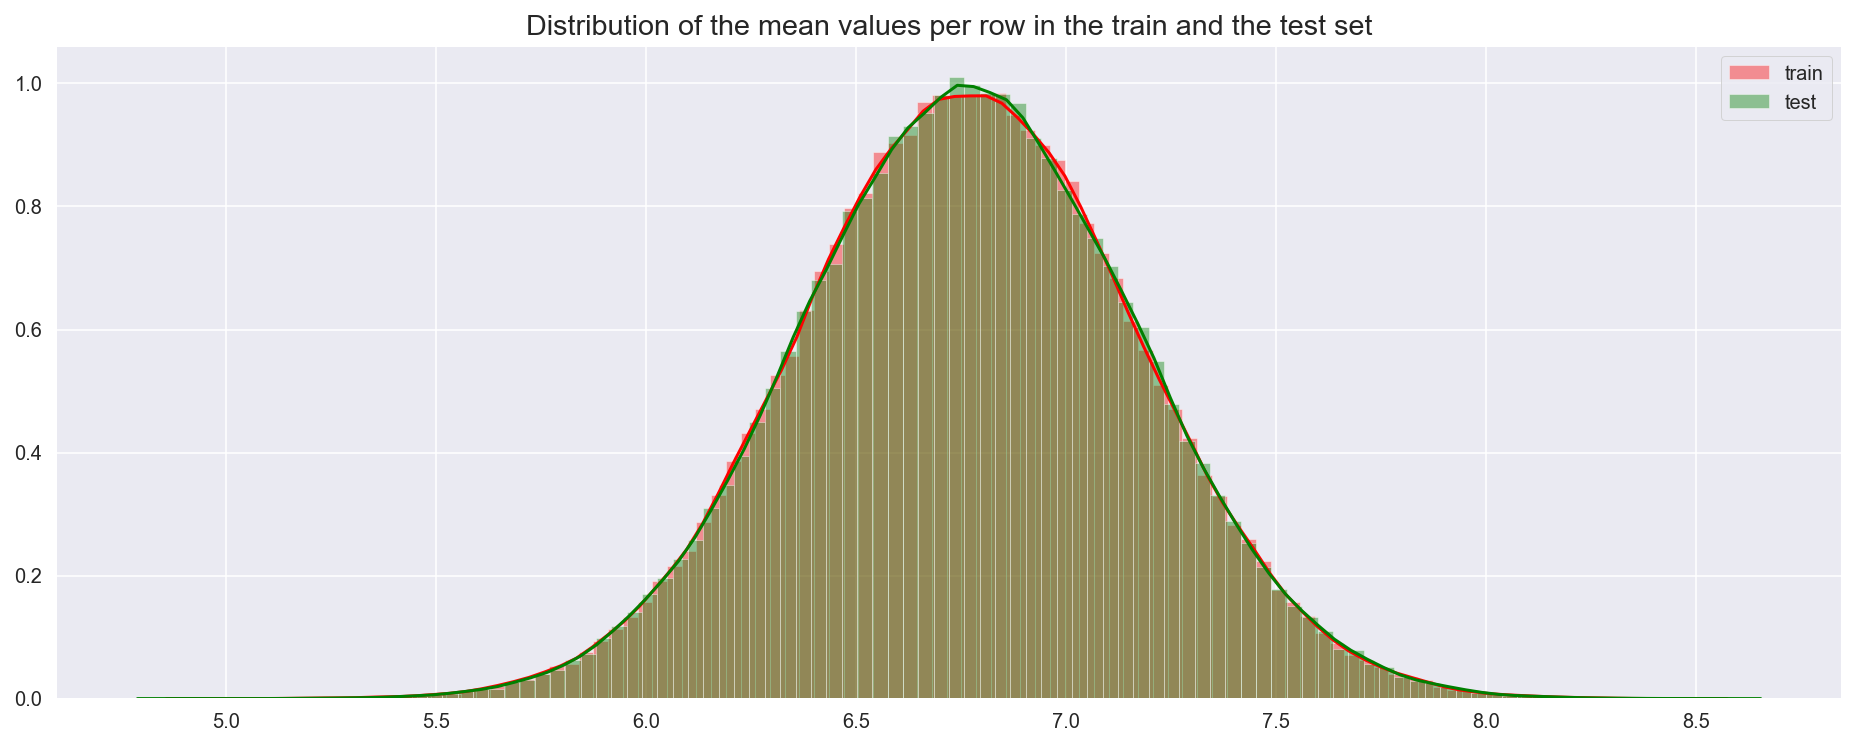

In [72]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title('Distribution of the mean values per row in the train and the test set')
sns.distplot(train[features].mean(axis=1), color='red', kde=True, bins=100, label='train')
sns.distplot(test[features].mean(axis=1), color='green', kde=True, bins=100, label='test')
plt.legend()
plt.show()

Now let's check the distribution of the mean values per **column** in the train and test set.

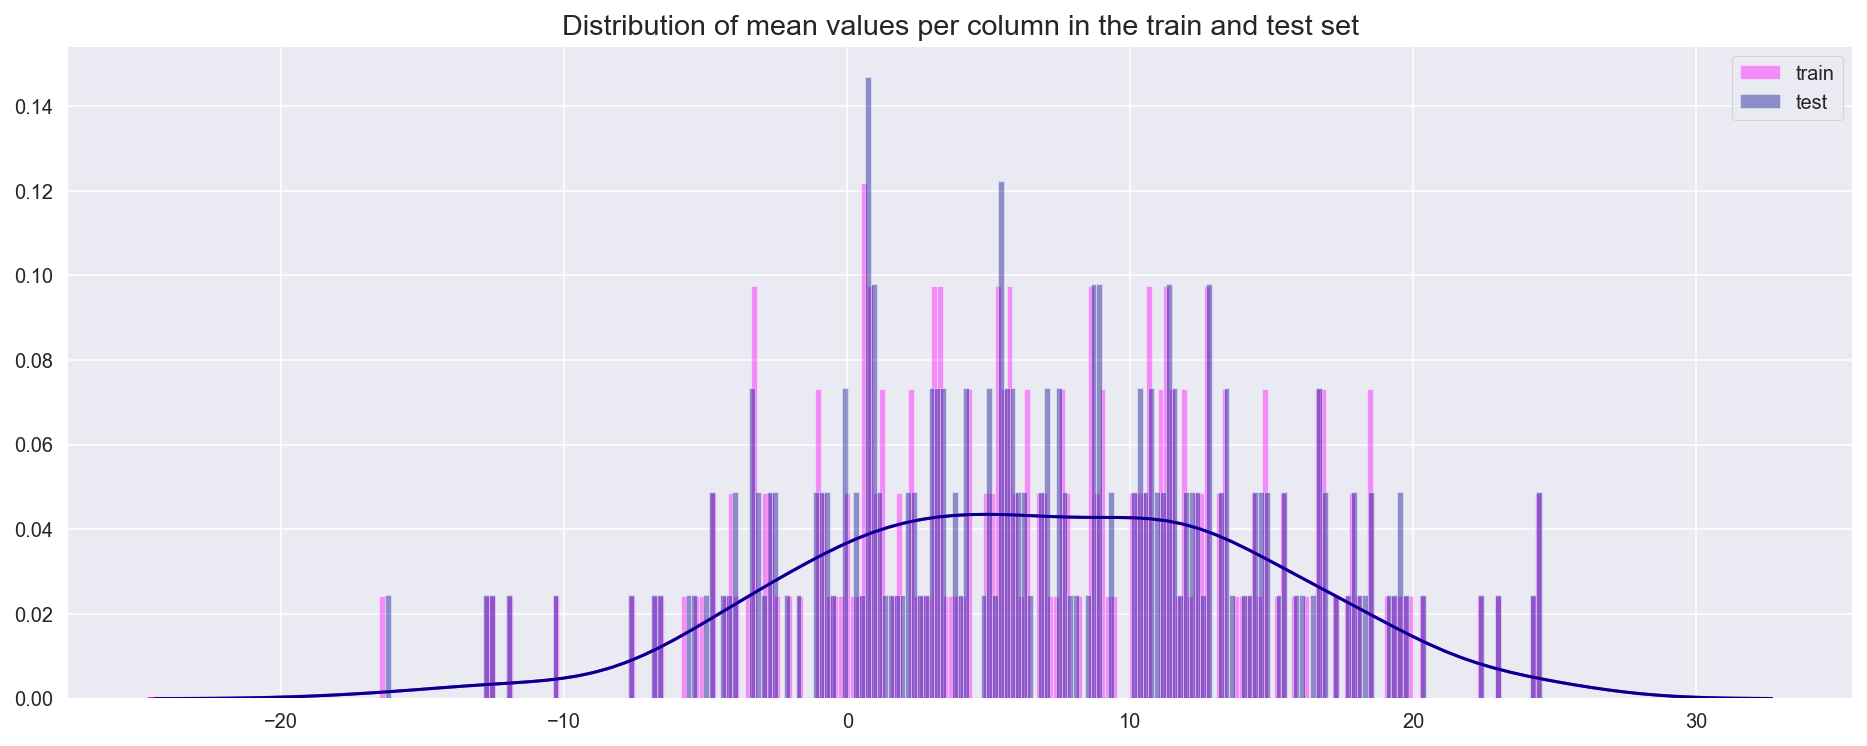

In [73]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
features = train.columns.values[2:202]
sns.distplot(train[features].mean(axis=0), color='magenta', kde=True, bins=200, label='train')
sns.distplot(test[features].mean(axis=0), color='darkblue', kde=True, bins=200, label='test')
plt.legend()
plt.show()

Now, lets check the distribution of the standard deviation of values per row for the train and the test set.

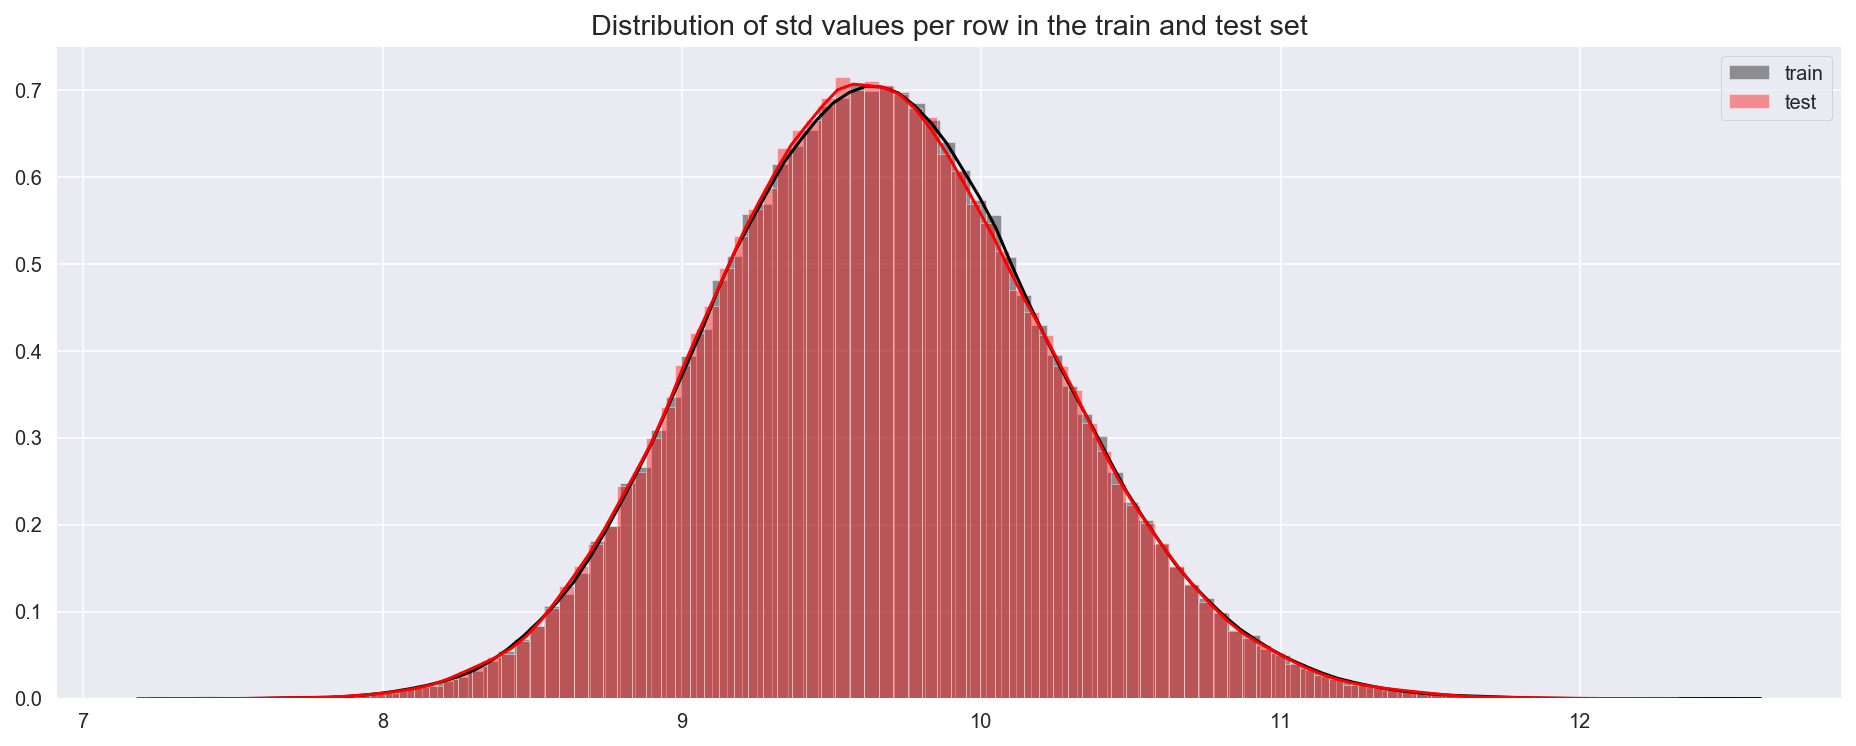

In [74]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
features = train.columns.values[2:202]
sns.distplot(train[features].std(axis=1), color='black', kde=True, bins=100, label='train')
sns.distplot(test[features].std(axis=1), color='red', kde=True, bins=100, label='test')
plt.legend()
plt.show()

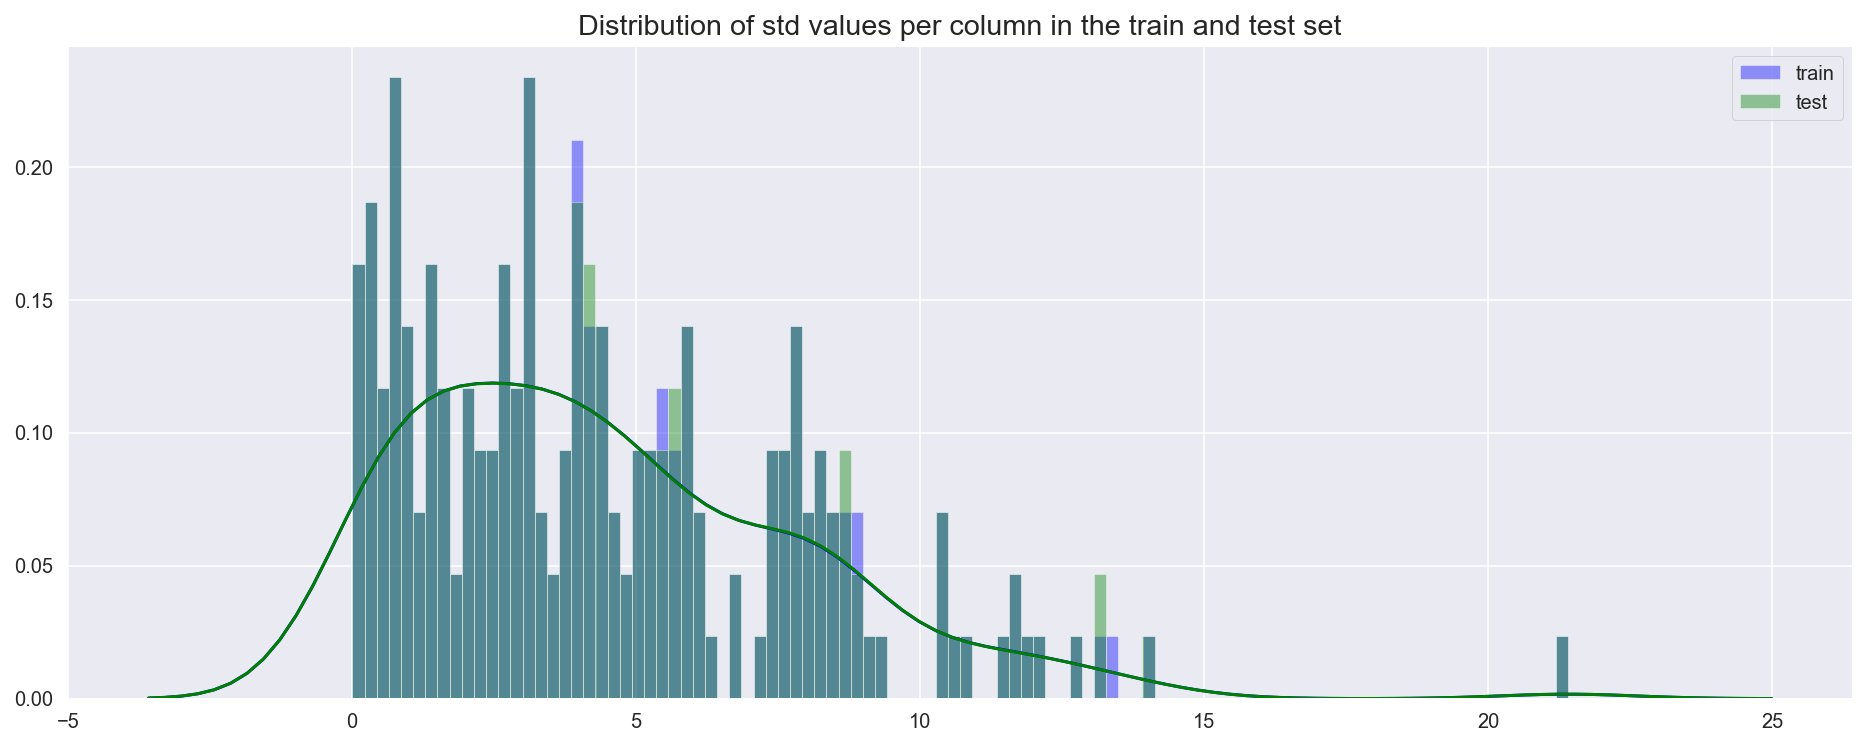

In [75]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
features = train.columns.values[2:202]
sns.distplot(train[features].std(axis=0), color='blue', kde=True, bins=100, label='train')
sns.distplot(test[features].std(axis=0), color='green', kde=True, bins=100, label='test')
plt.legend()
plt.show()

Let's check the now the distribution of the mean value per row in the train dataset, grouped by value of target.

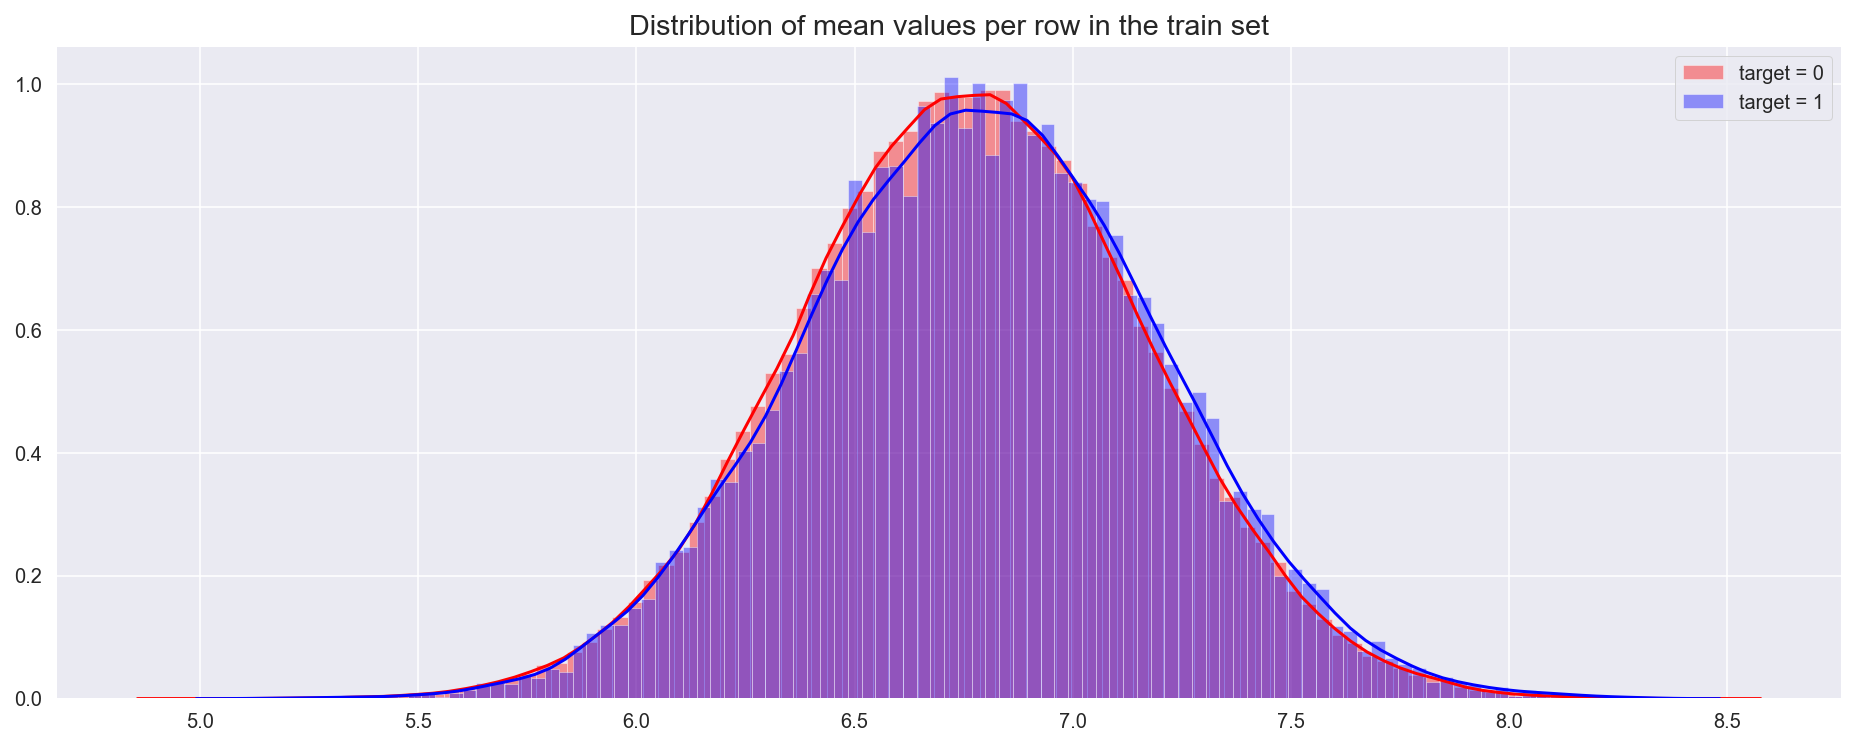

In [76]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title('Distribution of mean values per row in the train set')
sns.distplot(t0[features].mean(axis=1), color='red', kde=True, bins=100, label='target = 0')
sns.distplot(t1[features].mean(axis=1), color='blue', kde=True, bins=100, label='target = 1')
plt.legend()
plt.show();

Let's check now the distribution of the mean value per column in the train dataset, grouped by value of target.

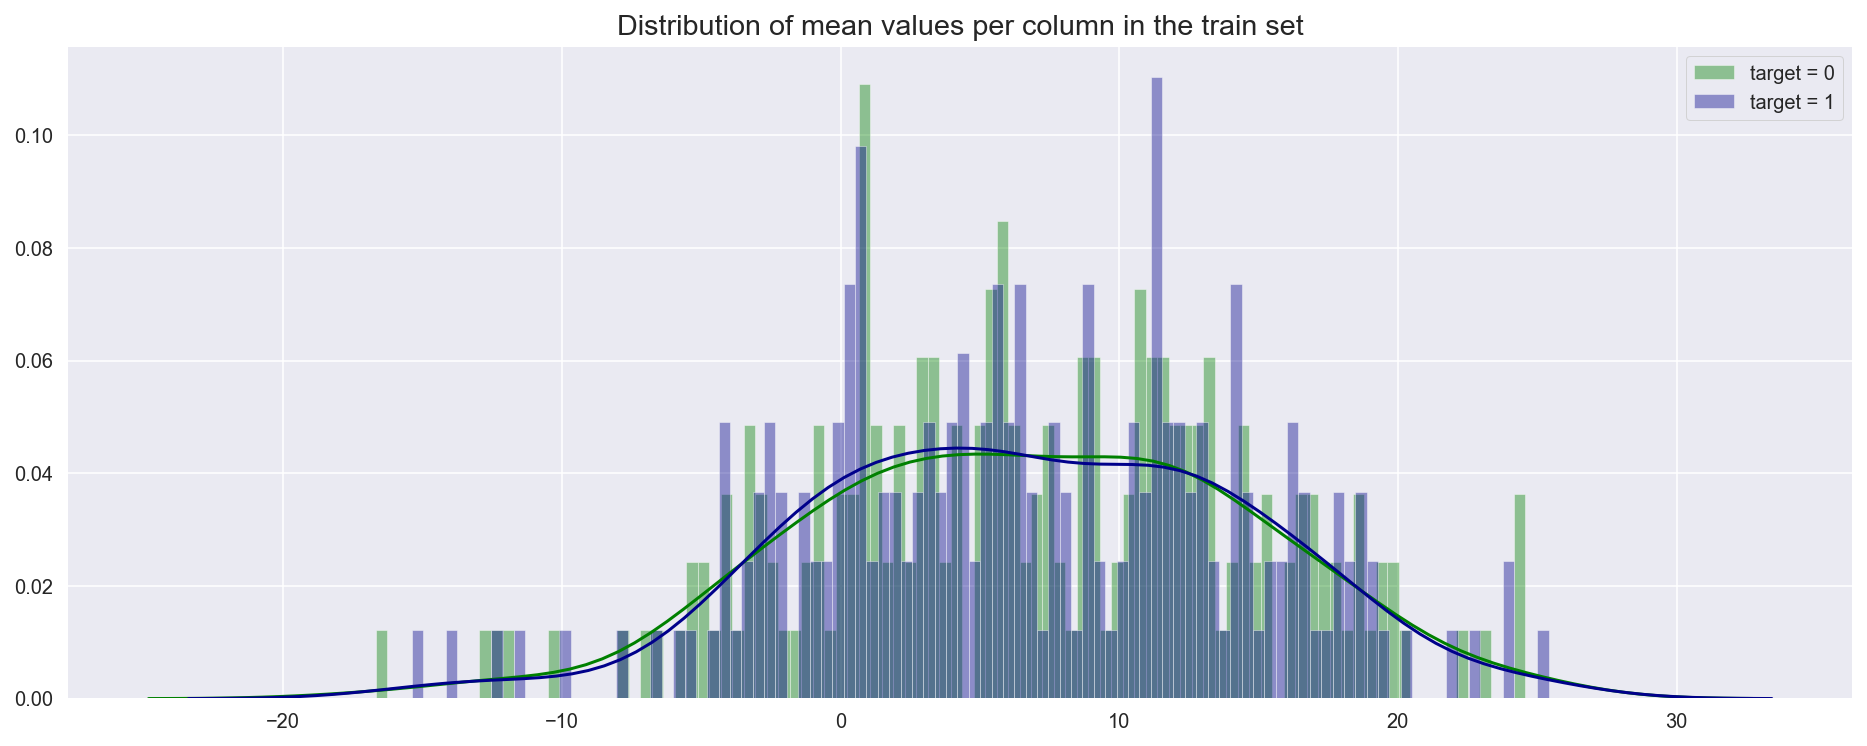

In [77]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title('Distribution of mean values per column in the train set')
sns.distplot(t0[features].mean(axis=0), color='green', kde=True, bins=100, label='target = 0')
sns.distplot(t1[features].mean(axis=0), color='darkblue', kde=True, bins=100, label='target = 1')
plt.legend()
plt.show()

**Distribution of min and max**<br>
Let's check the distribution of min per row in the train and test set.

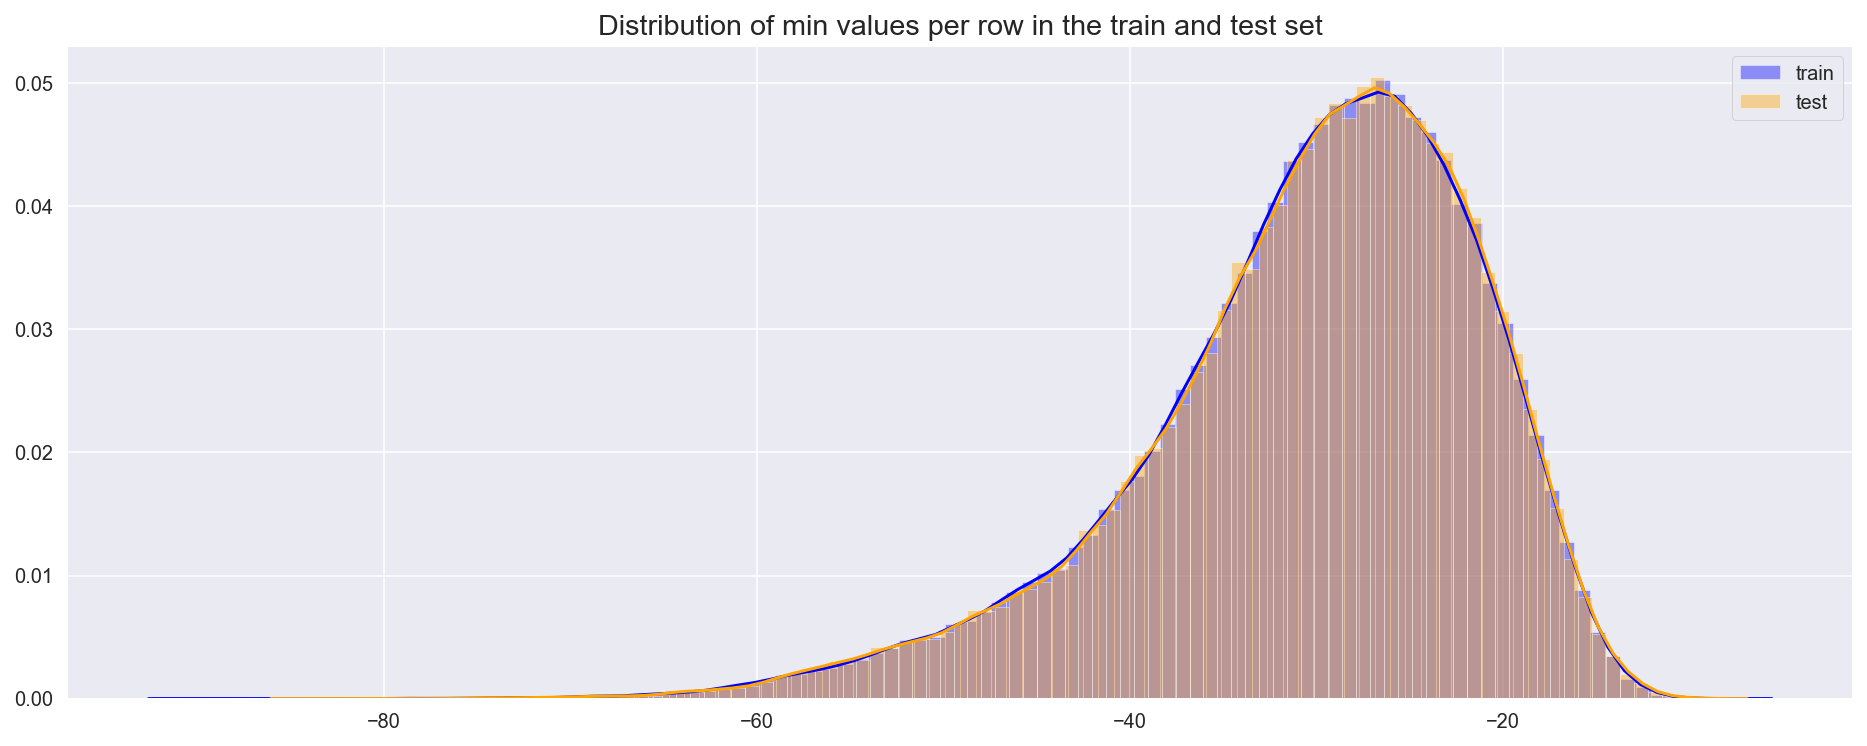

In [78]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train[features].min(axis=1),color="blue", kde=True,bins=100, label='train')
sns.distplot(test[features].min(axis=1),color="orange", kde=True,bins=100, label='test')
plt.legend()
plt.show()

A long queue to the lower values for both, extended as long as to -80 for test set, is observed.

Let's show the distribution of min per column in the train and test set.

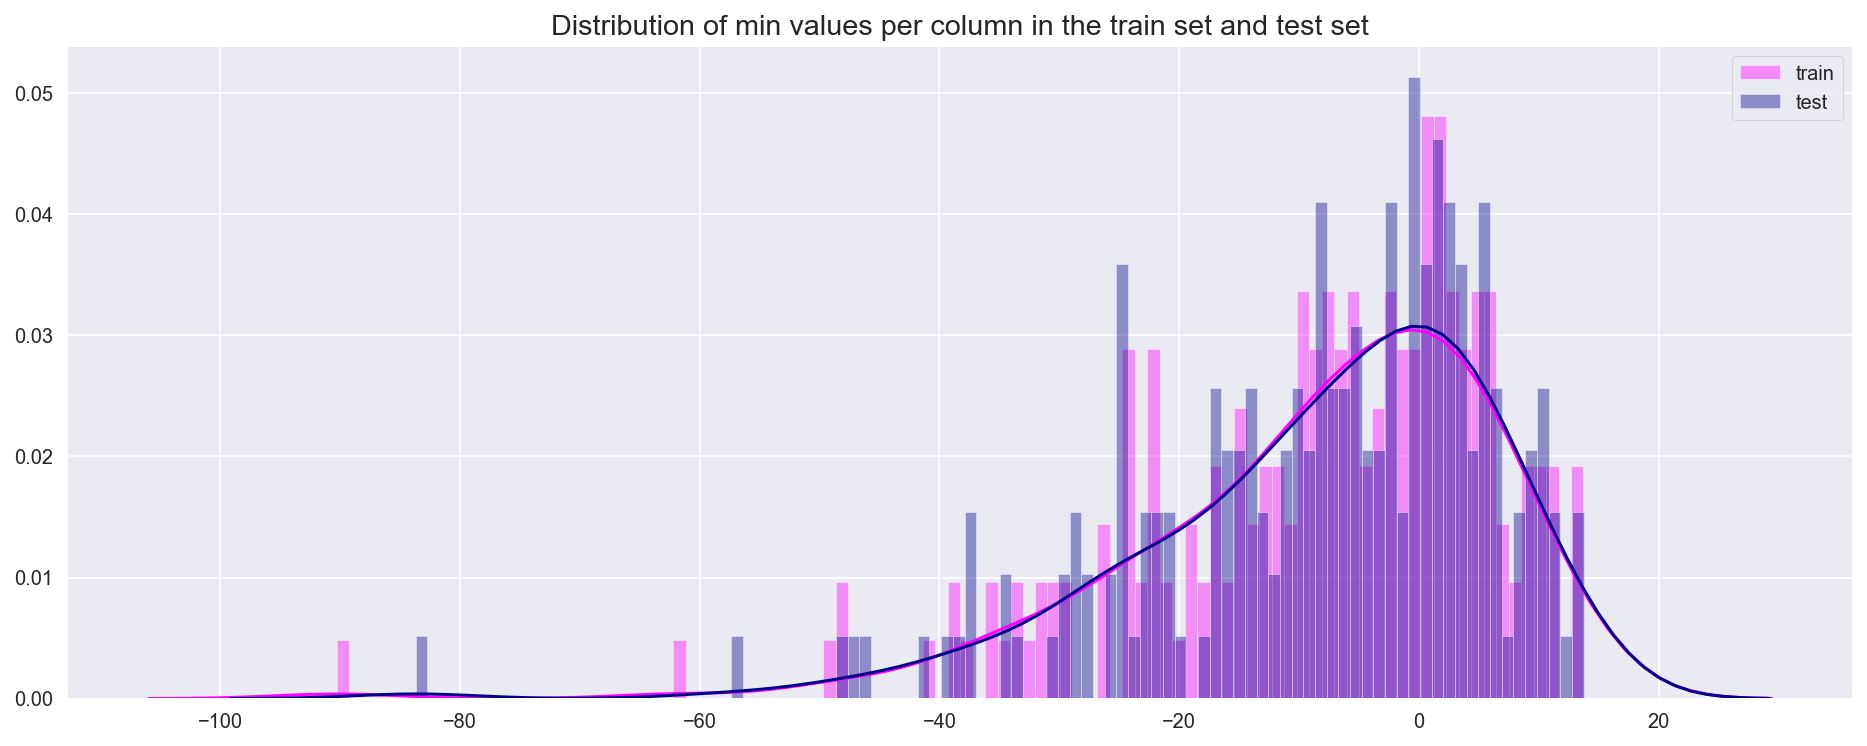

In [79]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title('Distribution of min values per column in the train set and test set')
sns.distplot(train[features].min(axis=0), color='magenta', kde=True, bins=100, label='train')
sns.distplot(test[features].min(axis=0), color='darkblue', kde=True, bins=100, label='test')
plt.legend()
plt.show()

**Distribution of skew and kurtosis**<br>
Let's see now what is the distribution of skew values per rows and columns.<br>
Let's see first the distribution of skewness calculated per rows in train and test sets.

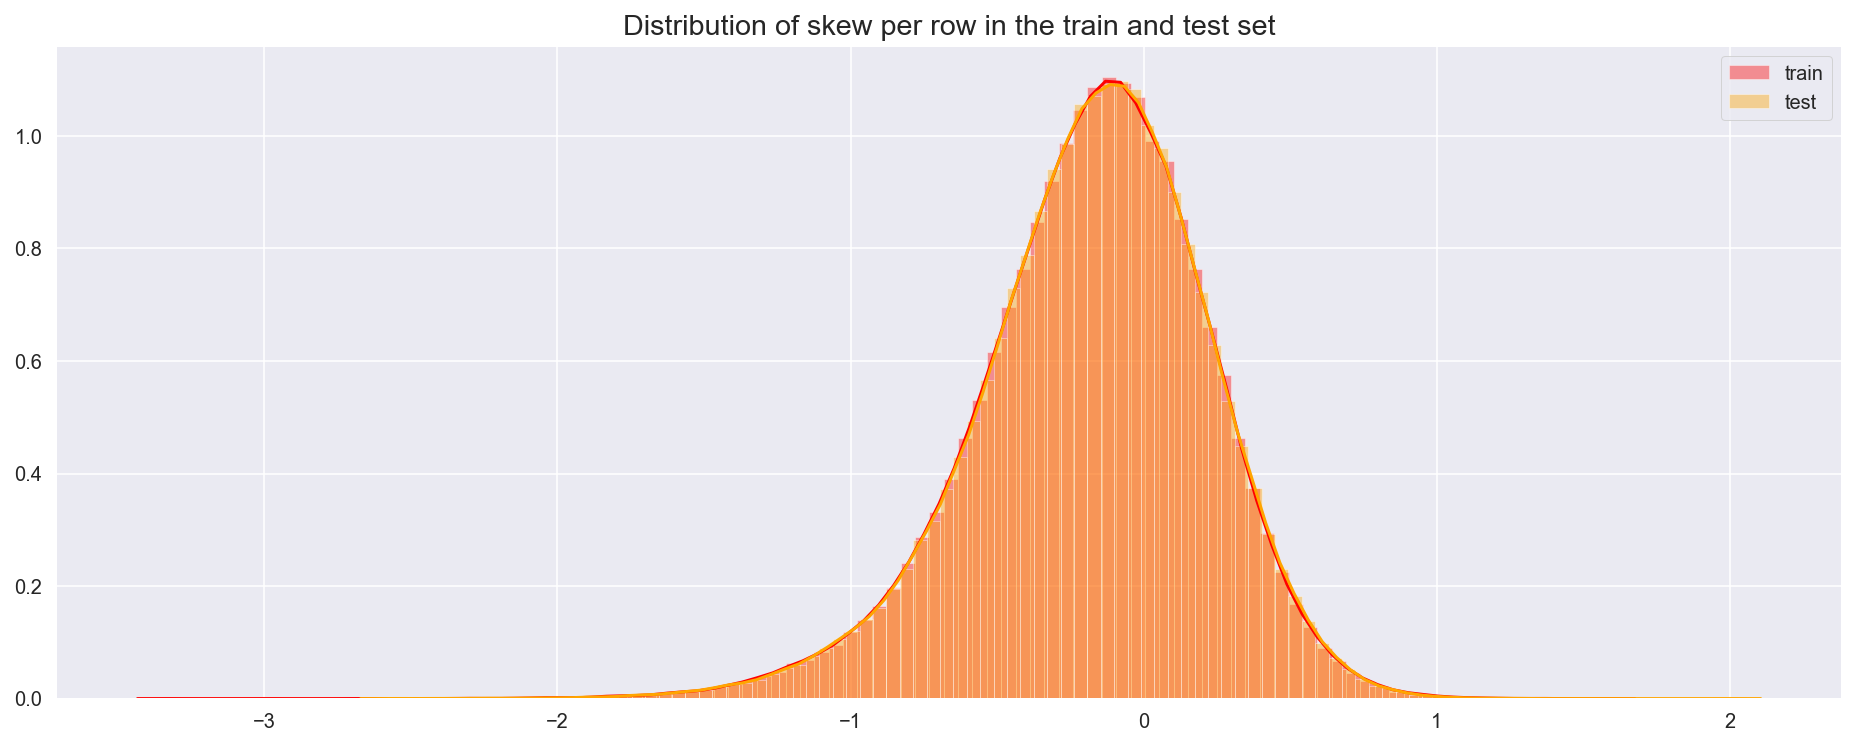

In [80]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per row in the train and test set")
sns.distplot(train[features].skew(axis=1),color="red", kde=True,bins=100, label='train')
sns.distplot(test[features].skew(axis=1),color="orange", kde=True,bins=100, label='test')
plt.legend()
plt.show()

Let's see first the distribution of skewness calculated per columns in train and test set.

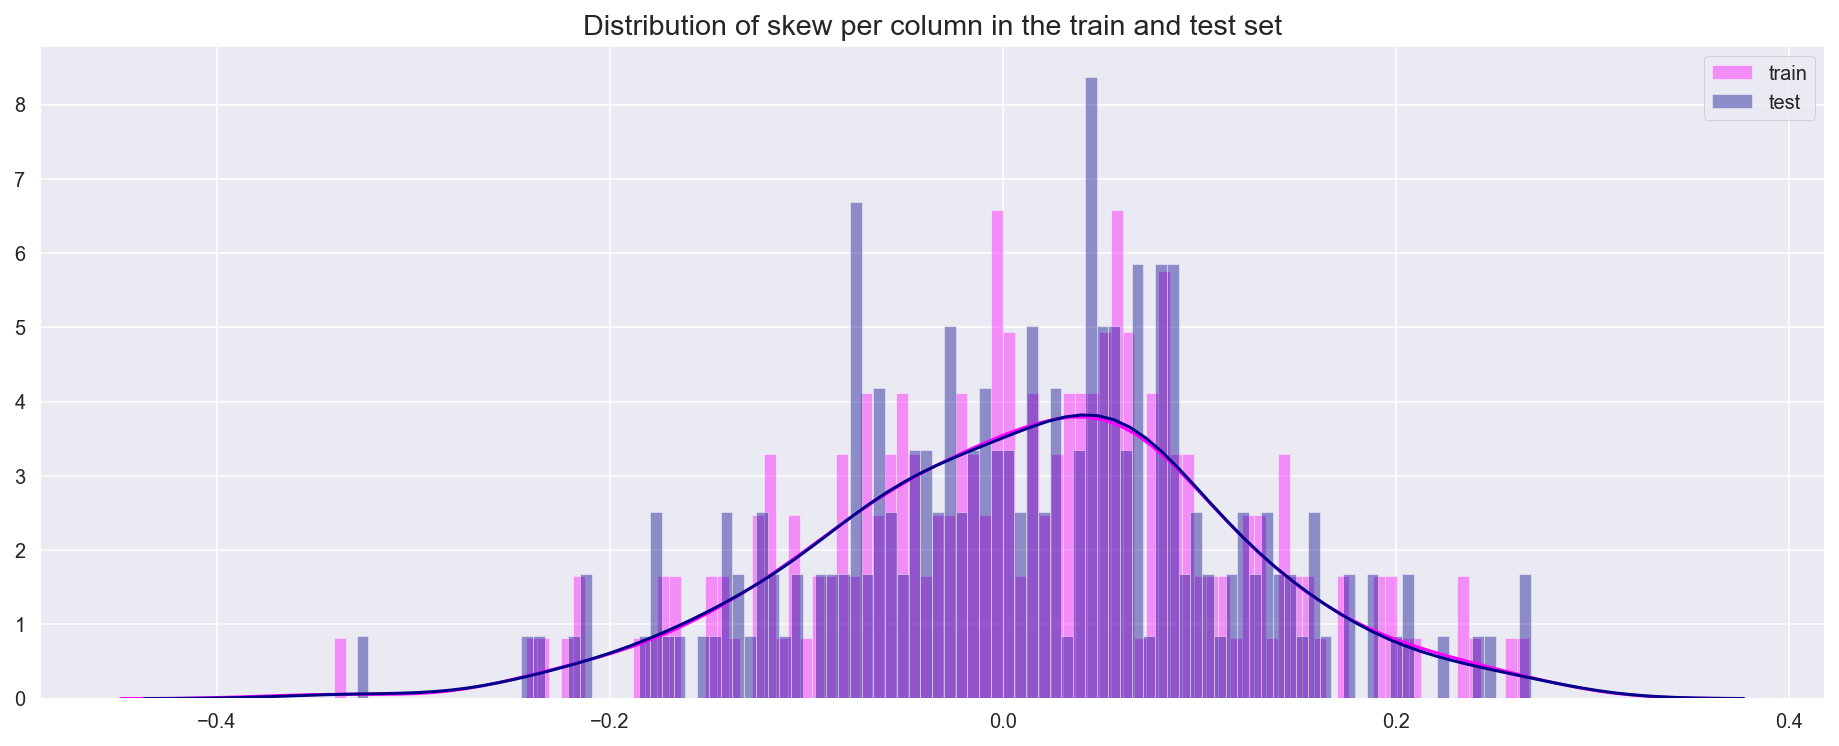

In [81]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train[features].skew(axis=0),color="magenta", kde=True,bins=100, label='train')
sns.distplot(test[features].skew(axis=0),color="darkblue", kde=True,bins=100, label='test')
plt.legend()
plt.show()

Let's see now what is the distribution of kurtosis values per rows and columns.

Let's see first the distribution of kurtosis calculated per rows in train and test sets.

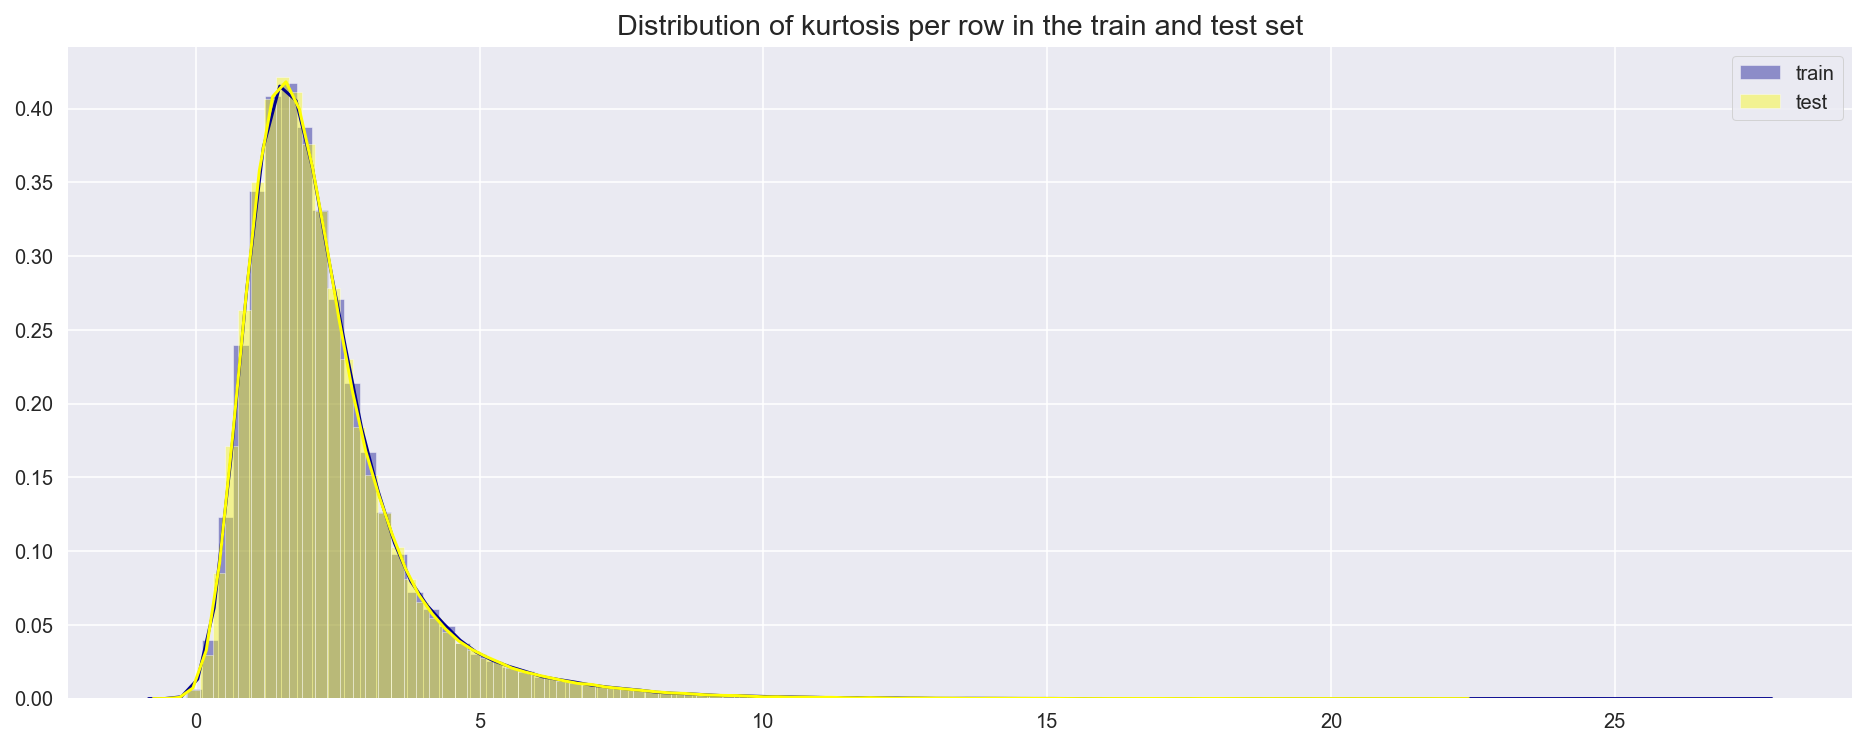

In [82]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per row in the train and test set")
sns.distplot(train[features].kurtosis(axis=1),color="darkblue", kde=True,bins=100, label='train')
sns.distplot(test[features].kurtosis(axis=1),color="yellow", kde=True,bins=100, label='test')
plt.legend()
plt.show()

Let's see first the distribution of kurtosis calculated per columns in train and test sets.

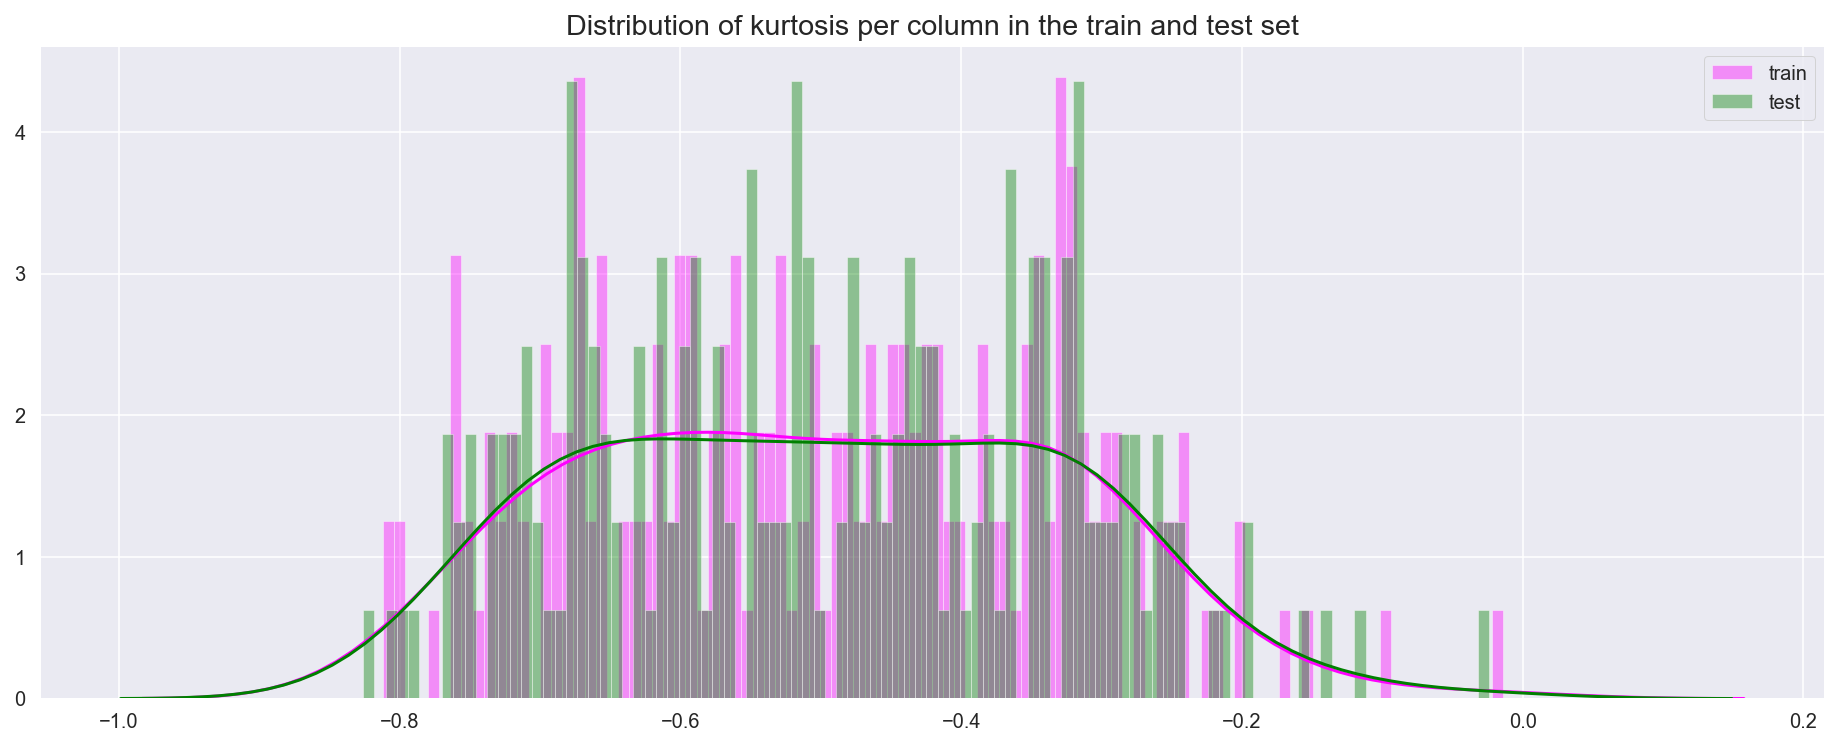

In [83]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis per column in the train and test set")
sns.distplot(train[features].kurtosis(axis=0),color="magenta", kde=True,bins=100, label='train')
sns.distplot(test[features].kurtosis(axis=0),color="green", kde=True,bins=100, label='test')
plt.legend()
plt.show()

##### C. Data Preprocessing 

The very first thing that I'd like to do is checking for the missing data in the train and test set.

In [84]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
    
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [85]:
check_missing_data(train)

False

In [86]:
check_missing_data(test)

False

Fortunately, we have no missing values. 

**Binary Classification**

In [87]:
train['target'].unique()

array([0, 1], dtype=int64)

Now, we are going to check if the data is unbalanced, but how can we solve it?

In [88]:
train['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

**skewness and kurtosis**

In [89]:
print('Skewness is: {}'.format(train['target'].skew()))
print('Kurtosis is: {}'.format(train['target'].kurt()))

Skewness is: 2.6576420477382454
Kurtosis is: 5.063111884925181


#### Reducing memory size by ~50% 

Because we make a lot of calculations in this kernel, we'd better reduce the size of the data.

1. 300 MB before Reducing
2. 150 MB after Reducing

### 5. Machine Learning Explainability for Santander

In this section, I want to try extract insights from models with the help of this excellent Course in Kaggle. The Goal behind of ML Explainability for Santander is:
1. All features are anonymized.(var_1, var2,...) but certainly the importance of each one is different!
2. Extract insights from models.
3. Find the most important feature in models.
4. Affect of each feature on the model's predictions.

#### 5.1 Partial Dependence Plots

While **feature importance** shows what **variables** most affect predictions, **partial dependence** plots shows how a feature affects prediction. 

In [96]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

tre_model= DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

For the sake of explanation, I use a Decision Tree which you can see below.

In [97]:
features = [i for i in train.columns if i not in ['ID_code', 'target']]

In [99]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(tre_model, out_file=None, feature_names=features)

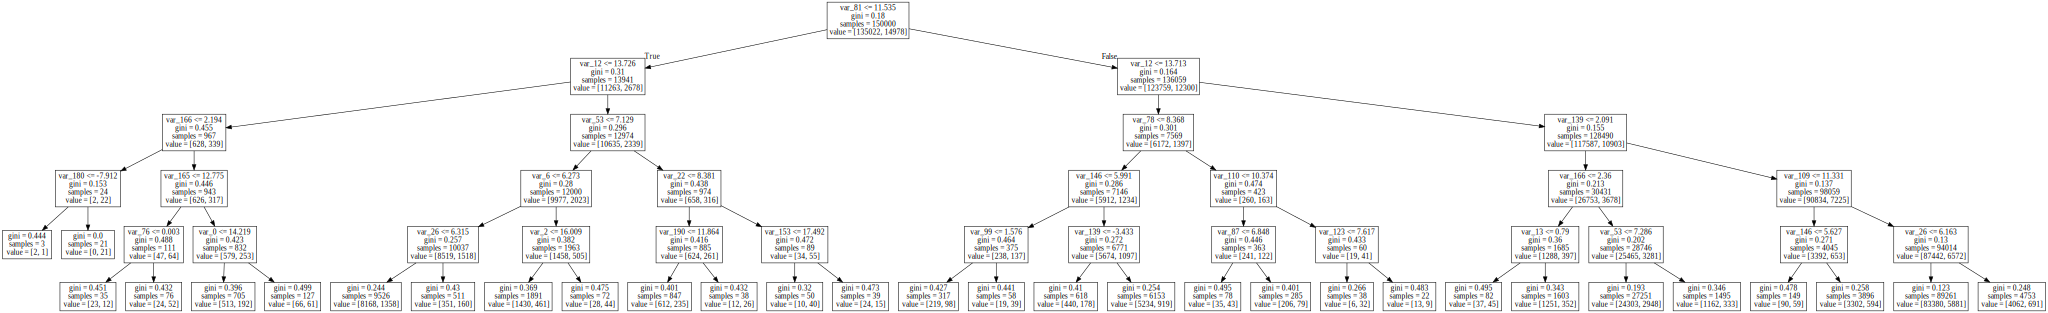

In [105]:

graphviz.Source(tree_graph)


Yes, var_81 are more effective on our model.

#### 5.5 Partial Dependence Plot

In this section, we see the impact of the main variables discovered in the previous sections by using the [pdpbox](https://pdpbox.readthedocs.io/en/latest/).

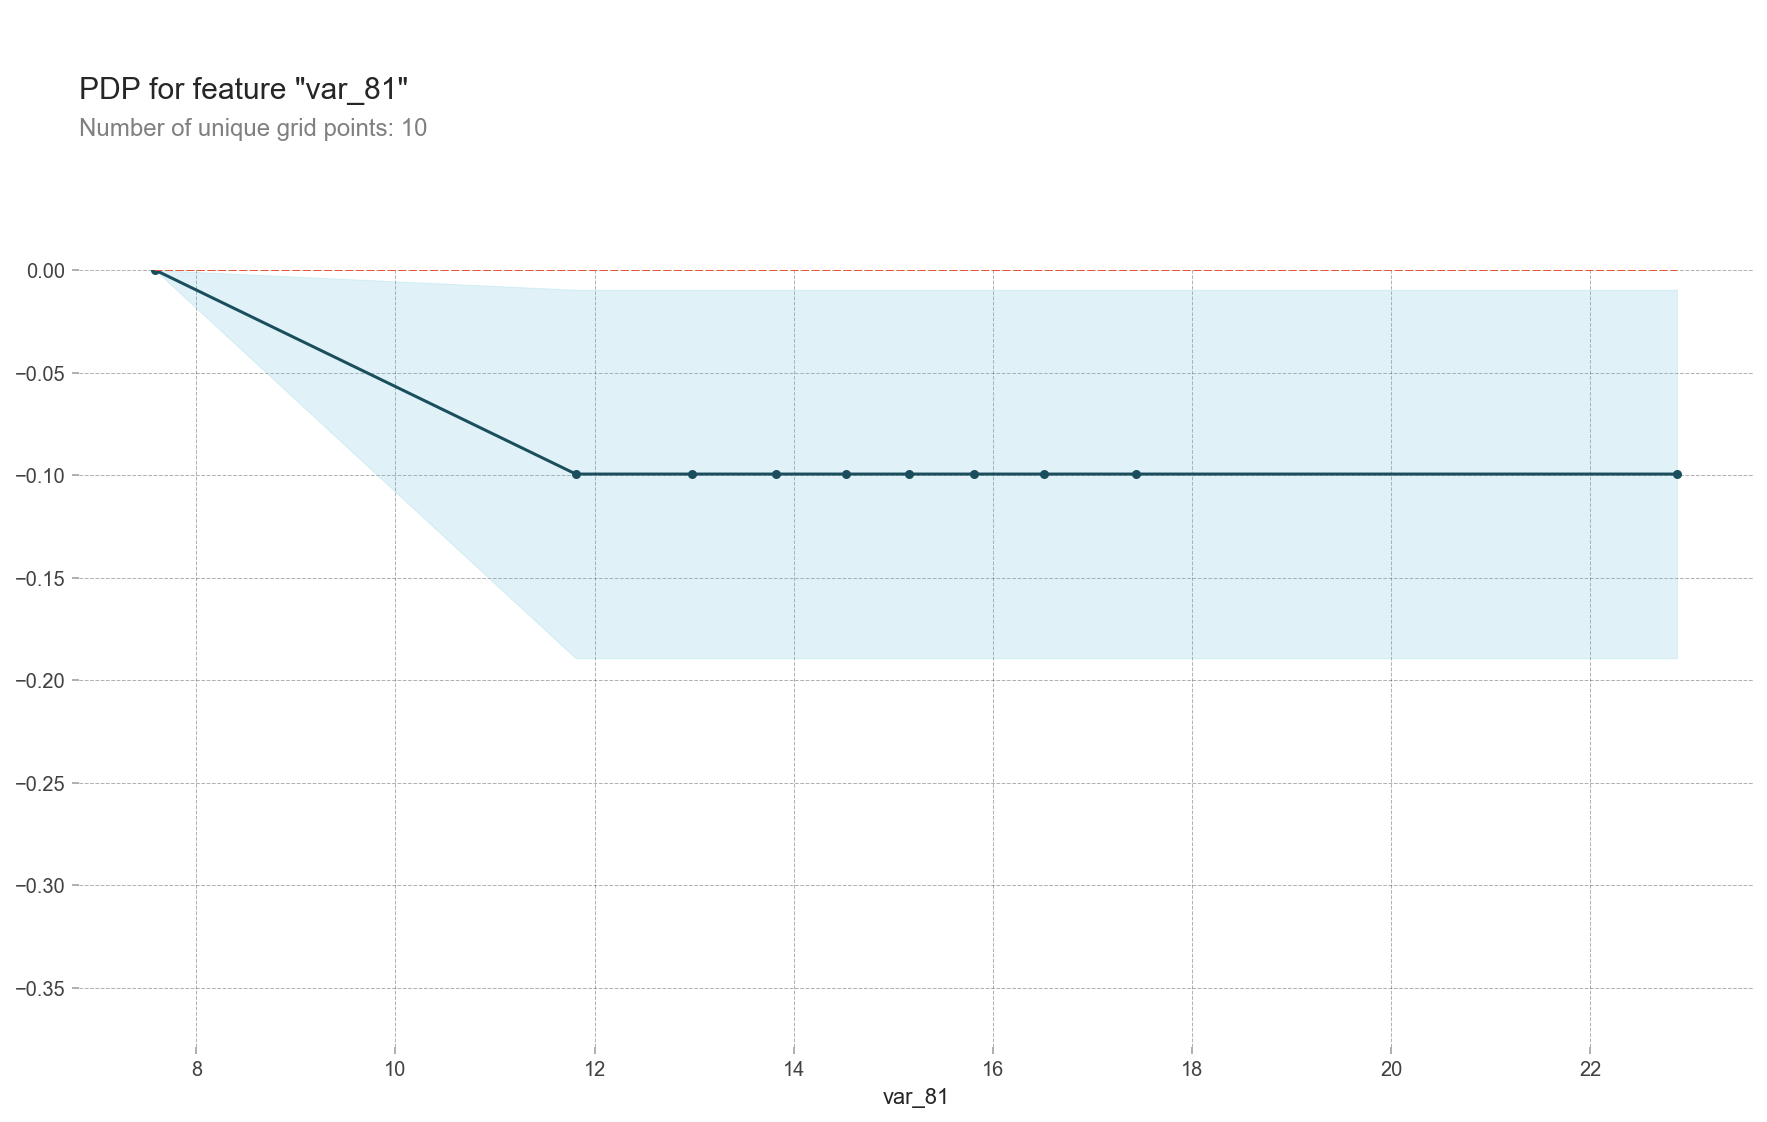

In [110]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that will plot
pdp_goals = pdp.pdp_isolate(model=tre_model, dataset=val_X, model_features=features, feature='var_81')

#plot it
pdp.pdp_plot(pdp_goals, 'var_81')
plt.show()

#### 5.2 Chart Analysis 
1. The y axis is interoreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
2. A blue shaded area indicates level of confidence.

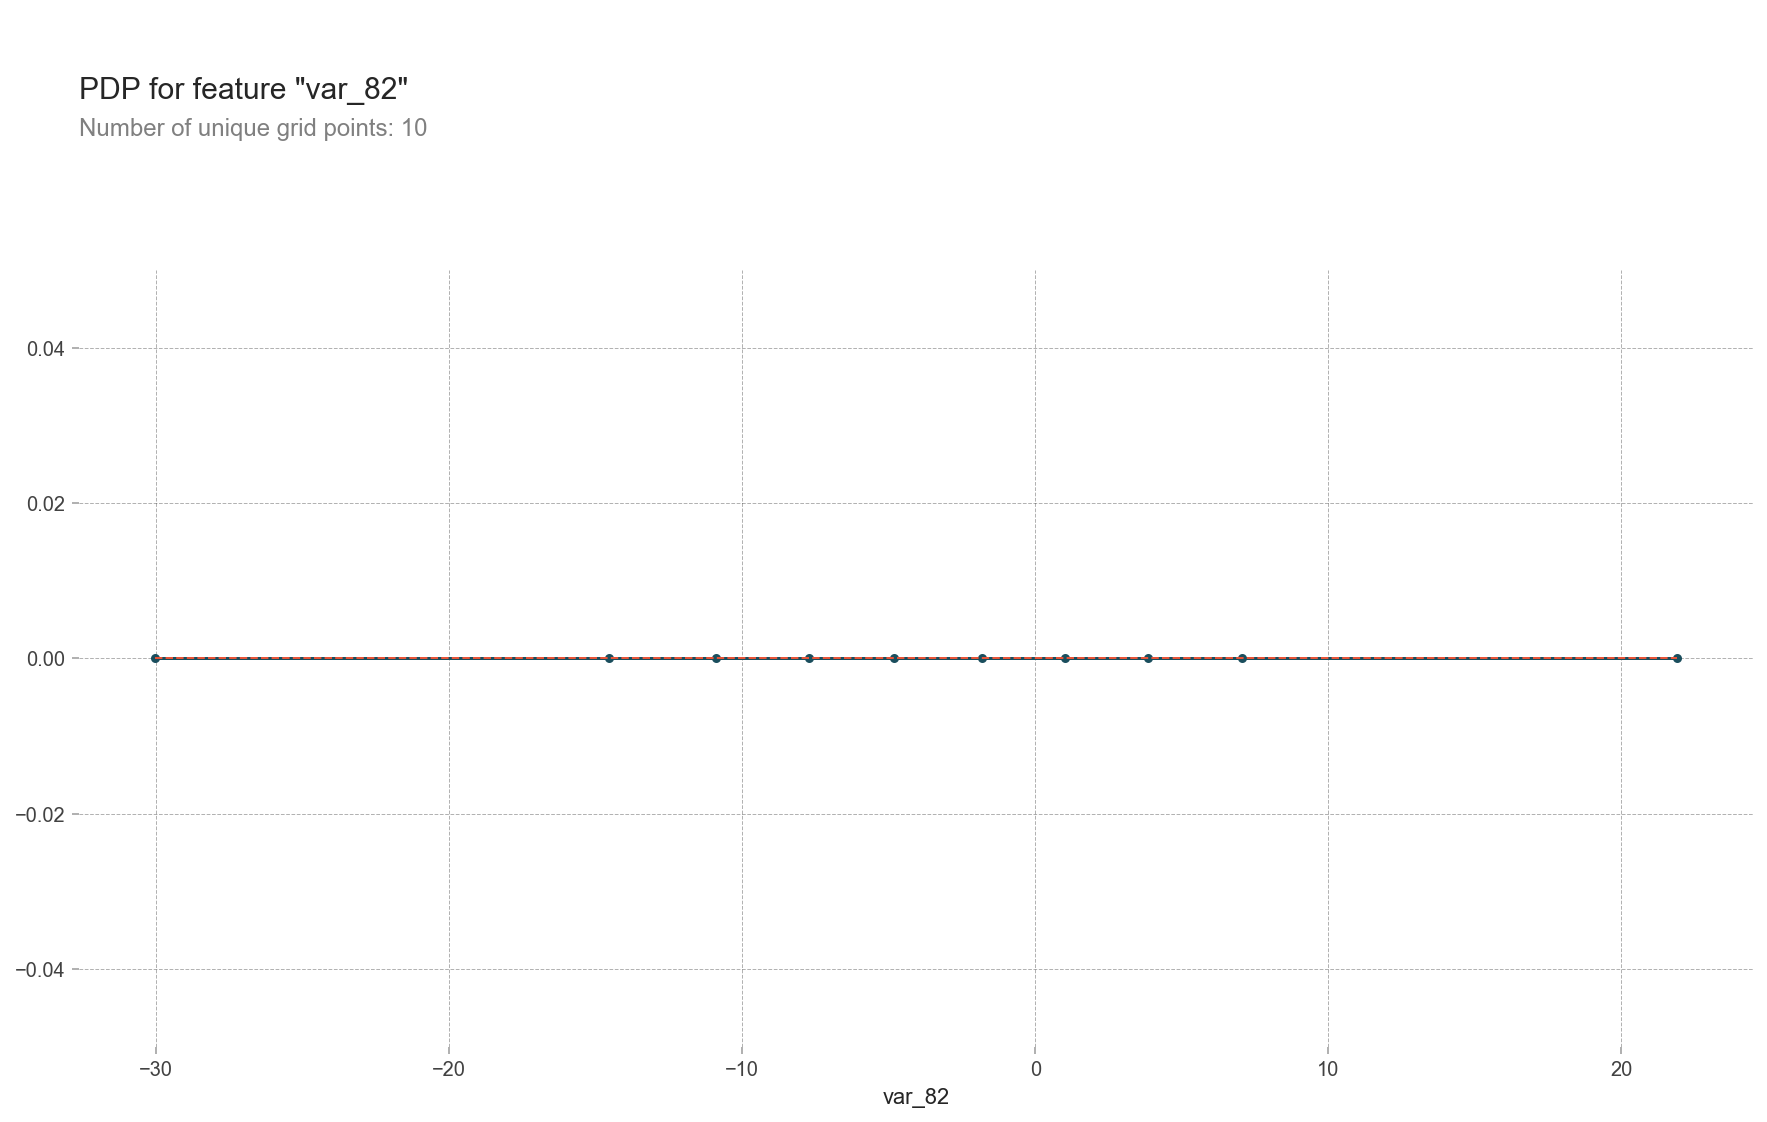

In [118]:
# Create the plot data that we will plot
pdp_goals = pdp.pdp_isolate(model=tre_model, dataset=val_X, model_features=features, feature='var_82')
                           
# plot it
pdp.pdp_plot(pdp_goals, 'var_82')
plt.show()

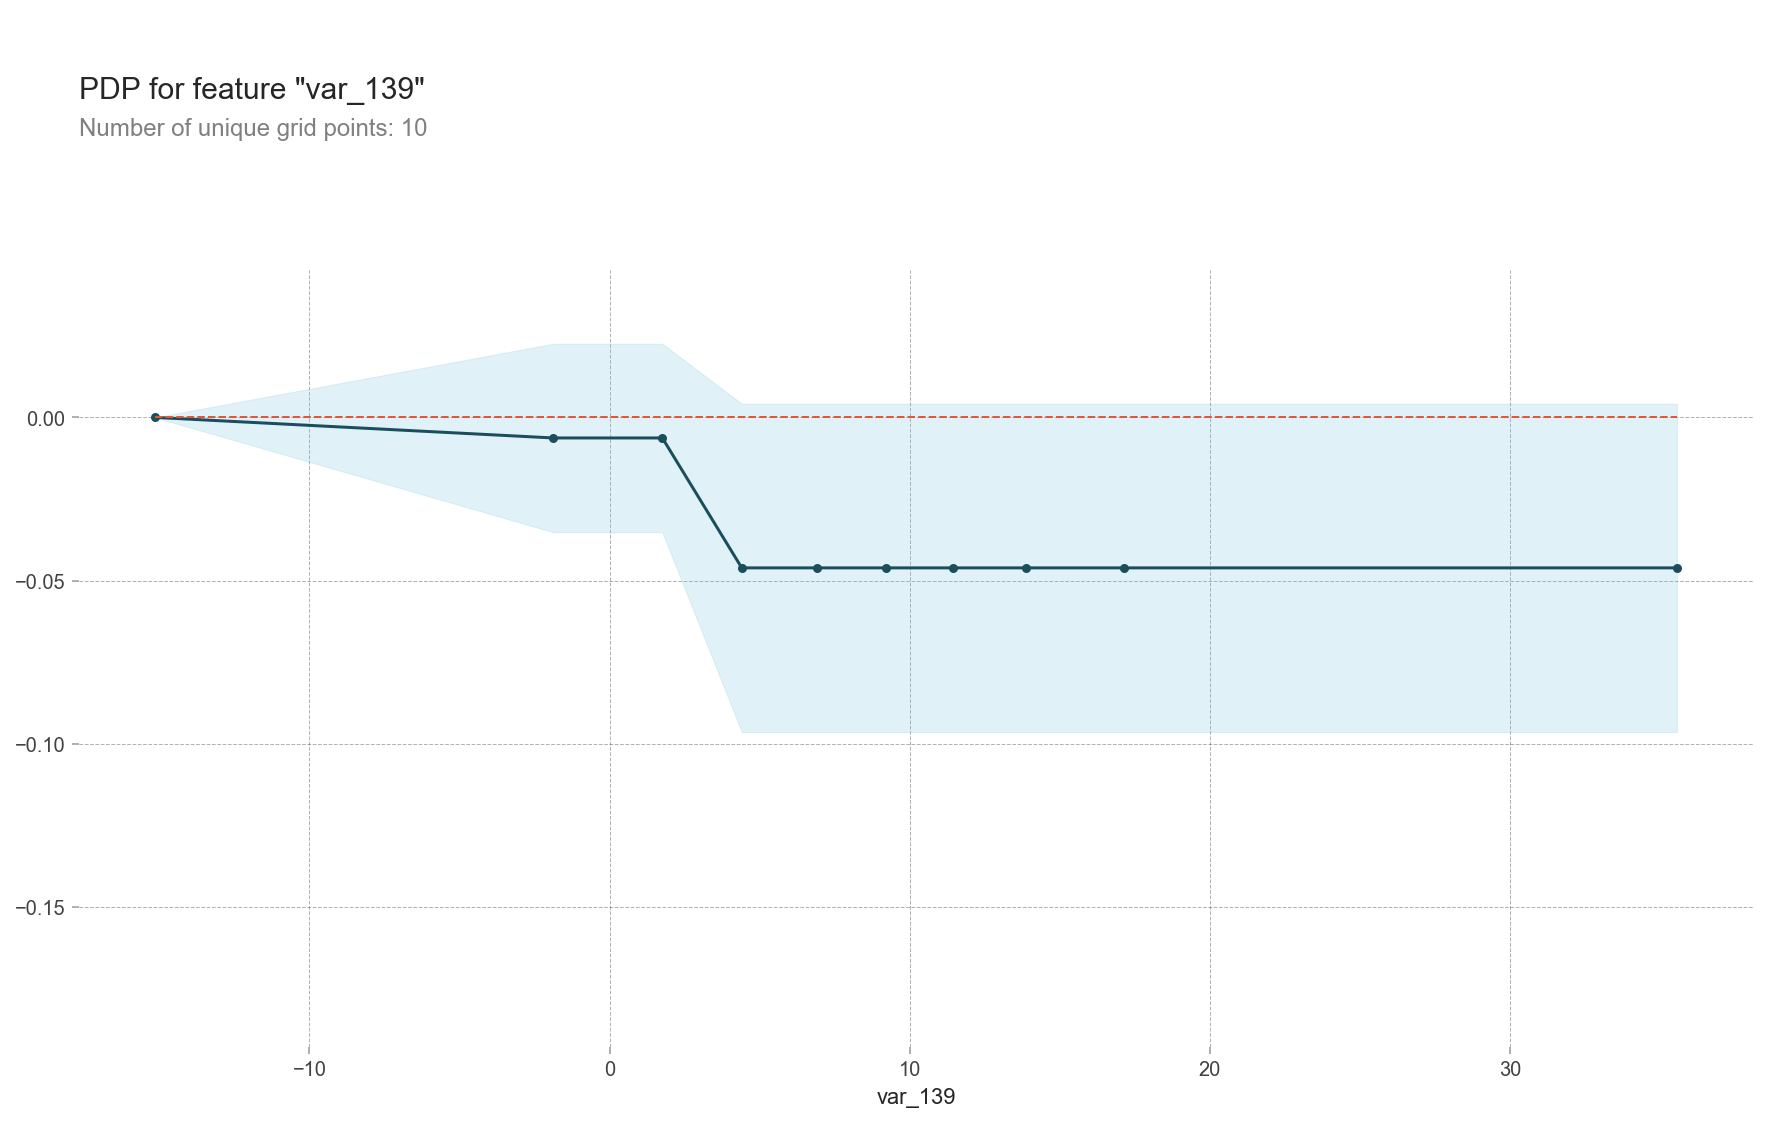

In [119]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tre_model, dataset=val_X, model_features=features, feature='var_139')

# plot it
pdp.pdp_plot(pdp_goals, 'var_139')
plt.show()

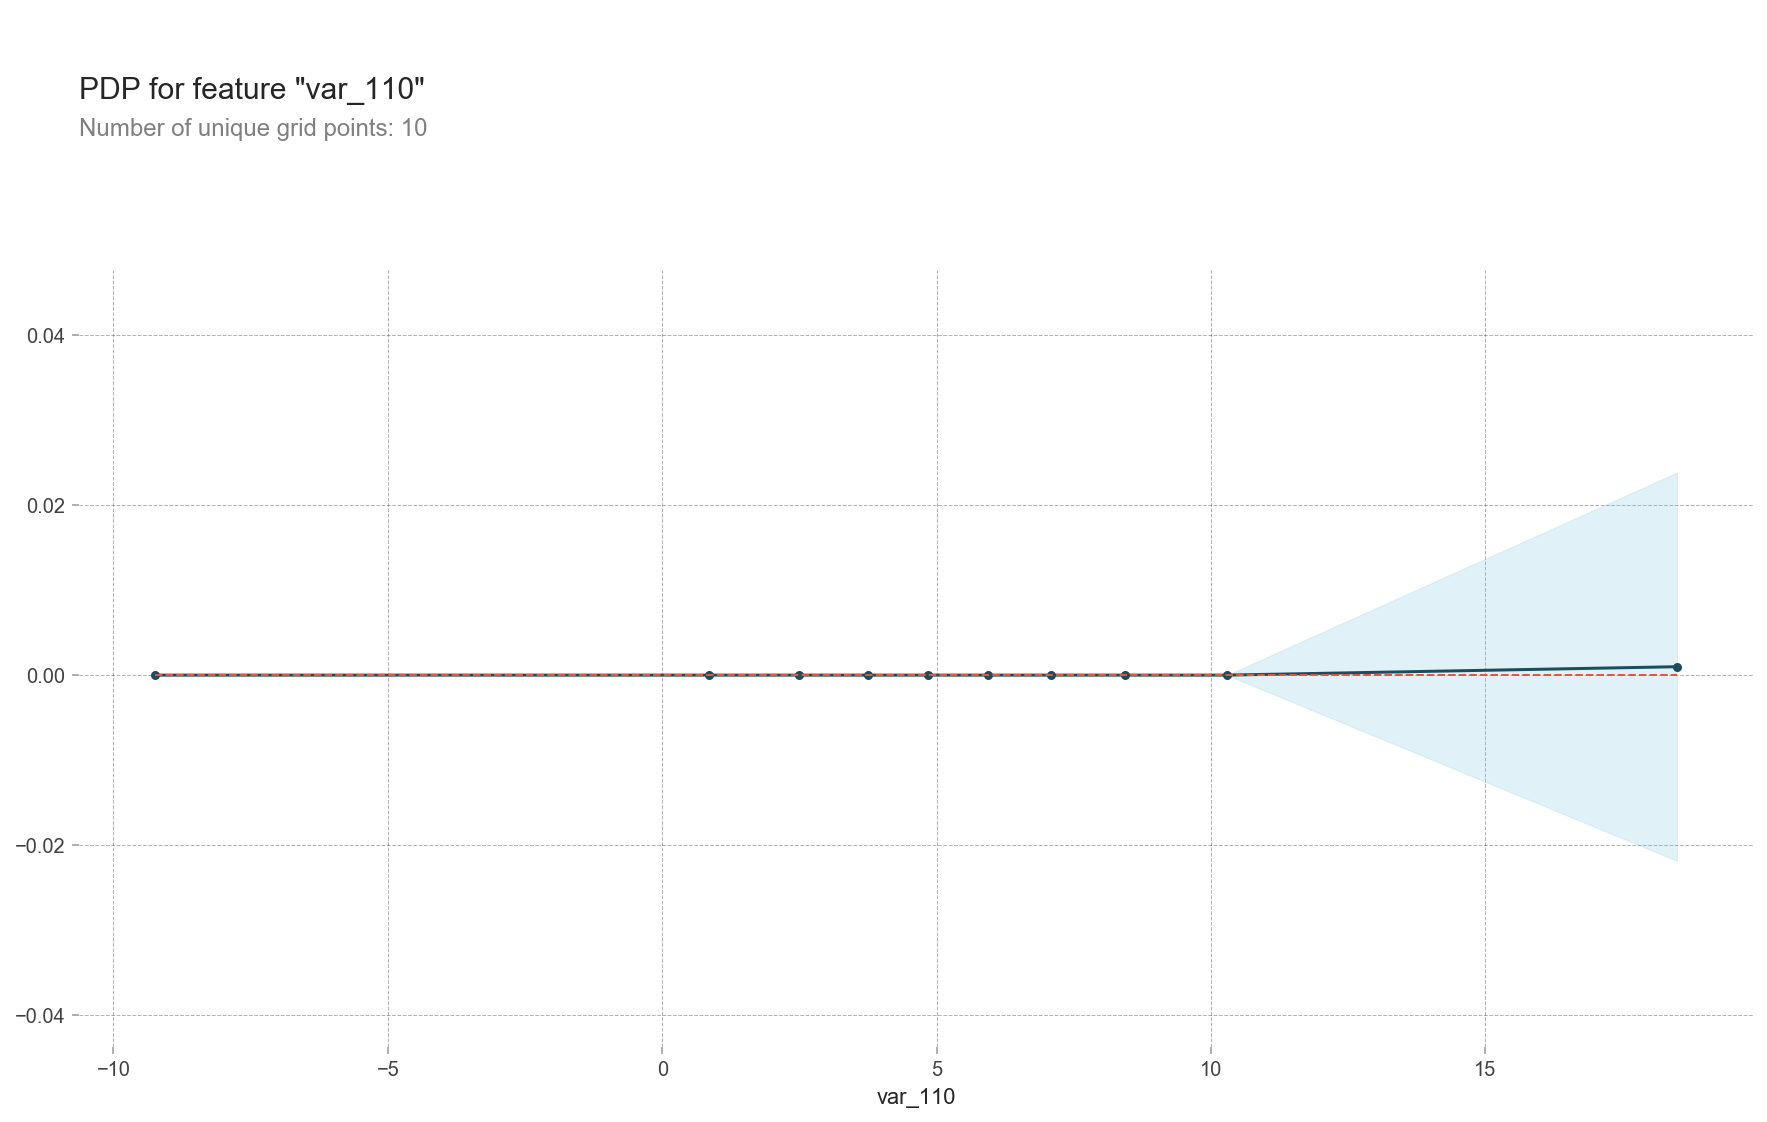

In [120]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tre_model, dataset=val_X, model_features=features, feature='var_110')

# plot it
pdp.pdp_plot(pdp_goals, 'var_110')
plt.show()

#### 5.3 SHAP Values 

**SHAP**(SHapley Additive exPlanation) is a unified approach to explain the output of **any machine learning model** SHAP connects game theory with local explanation, uniting several previous methods [5.1 - 5.7] and representing the only possible consistent and locally accurate additive feature attribution method based onexpectations. 

**Note:** Shap can answer to this question: **How the model works for an individual prediction?**

In [127]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show] 

data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

rfc_model.predict_proba(data_for_prediction_array)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[0.94, 0.06]])

In [129]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfc_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction, check_additivity=False)

In [130]:
print('shap: {}'.format(shap.__version__))

shap: 0.34.0


In [131]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

### 6. Model Developement

So far, we have used two models, and at this point we add four more models and we'll explain them as well. 

1. lightgbm
2. RandomForestClassifier
3. DecisionTreeClassifier
4. CatBoostClassifier

In [132]:
# params is based on following kernel https://www.kaggle.com/brandenkmurray/nothing-works
params = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.01,
               'num_leaves' : 13,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 80,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

In [133]:
%%time
y_pred_lgb = np.zeros(len(X_test))
num_round = 1000000
for fold_n, (train_index, valid_index) in enumerate(folds.split(X,y)):
    print('Fold', fold_n, 'started at', time.ctime())
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
        
    lgb_model = lgb.train(params,train_data,num_round,#change 20 to 2000
                    valid_sets = [train_data, valid_data],verbose_eval=1000,early_stopping_rounds = 3500)##change 10 to 200
            
    y_pred_lgb += lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)/5

Fold 0 started at Wed May 13 01:00:49 2020
Training until validation scores don't improve for 3500 rounds
[1000]	training's auc: 0.90146	valid_1's auc: 0.882119
[2000]	training's auc: 0.913584	valid_1's auc: 0.890925
[3000]	training's auc: 0.921679	valid_1's auc: 0.895113
[4000]	training's auc: 0.927706	valid_1's auc: 0.897423
[5000]	training's auc: 0.932795	valid_1's auc: 0.898909
[6000]	training's auc: 0.937434	valid_1's auc: 0.89969
[7000]	training's auc: 0.941595	valid_1's auc: 0.90017
[8000]	training's auc: 0.945493	valid_1's auc: 0.9004
[9000]	training's auc: 0.949201	valid_1's auc: 0.900532
[10000]	training's auc: 0.952714	valid_1's auc: 0.900422
[11000]	training's auc: 0.956123	valid_1's auc: 0.900464
[12000]	training's auc: 0.959378	valid_1's auc: 0.900511
[13000]	training's auc: 0.962453	valid_1's auc: 0.900488
[14000]	training's auc: 0.965375	valid_1's auc: 0.900382
[15000]	training's auc: 0.968119	valid_1's auc: 0.900298
Early stopping, best iteration is:
[11702]	training's

##### 6.2 RandomForestClassifier

In [136]:
y_pred_rfc = rfc_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.1s finished


##### 6.3 DecisionTreeClassifier

In [139]:
y_pred_tree = tre_model.predict(X_test)

##### 6.4 CatBoostClassifier

In [140]:
train_pool = Pool(train_X,train_y)
cat_model = CatBoostClassifier(
                               iterations=3000,# change 25 to 3000 to get best performance 
                               learning_rate=0.03,
                               objective="Logloss",
                               eval_metric='AUC',
                              )
cat_model.fit(train_X,train_y,silent=True)
y_pred_cat = cat_model.predict(X_test)

### 7. References <a class="anchor" id="References"></a>


[Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)<br>
[Santander ML Explainability](https://www.kaggle.com/mjbahmani/santander-ml-explainability/comments#487596)<br>
[Santander EDA and Prediction](https://www.kaggle.com/gpreda/santander-eda-and-prediction)<br>
[Dataset](https://www.kaggle.com/c/santander-customer-transaction-prediction)<br>